# <span style="color:cornflowerblue">Matplotlib for Publication</span>

### When visualizing your research data, you may ask yourself...
- How do I make my figures typographically consistent with each other and the rest of the paper?
- What is the best plot format to communicate the results of my research?
- How can I combine or overlay related data without sacrificing readability?
- How can I make my figures more accessible to readers with colorblindness or other common impairments?
- What might be lost if my figure is printed (e.g., in greyscale or resized to fit on A4 paper)?

With this workshop I hope to not only enrich your Matplotlib skillset, but also advise on good practices for making your data visuals more accessible, informative, and professional.

Many of these tips, though informed by experience, are subjective and open to disagreement. Plotting is as much an art as it is a science.

Let's get started!

## Global Constraints
**A journal's printable dimensions, especially the short axis, will determine the maximum figure size.** Check your journal's submission guidelines for the exact margins, but for most journals, a safe maximum figure size is about 15 cm $\times$ 20 cm.

|    | A4 | US Letter |
| --- | --- | --- |
| Width (cm) | 21 | 21.59 (8.5") |
| Height (cm) | 29.7 | 27.94 (11") |
| Margins (cm) | 2-3 | 2.54-3.18 (1-1.25") |
| **Printable width (cm)** | 15-17 | 15-17 (6-6.5") |
| **Printable height (cm)** | 23.7-25.7 | 20.3-22.9 (8-9") |

- The smallest readable *subfigure* will depend on data and design choices, but **a good rule of thumb is to avoid having subplots smaller than 3 cm wide**.
- Color bars and axis labels also take up space $\to$ subplot grids with more than 4 $\times$ 6 panels should generally be avoided (might get away with 1 more row or column with low-res images that don't need axis labels).

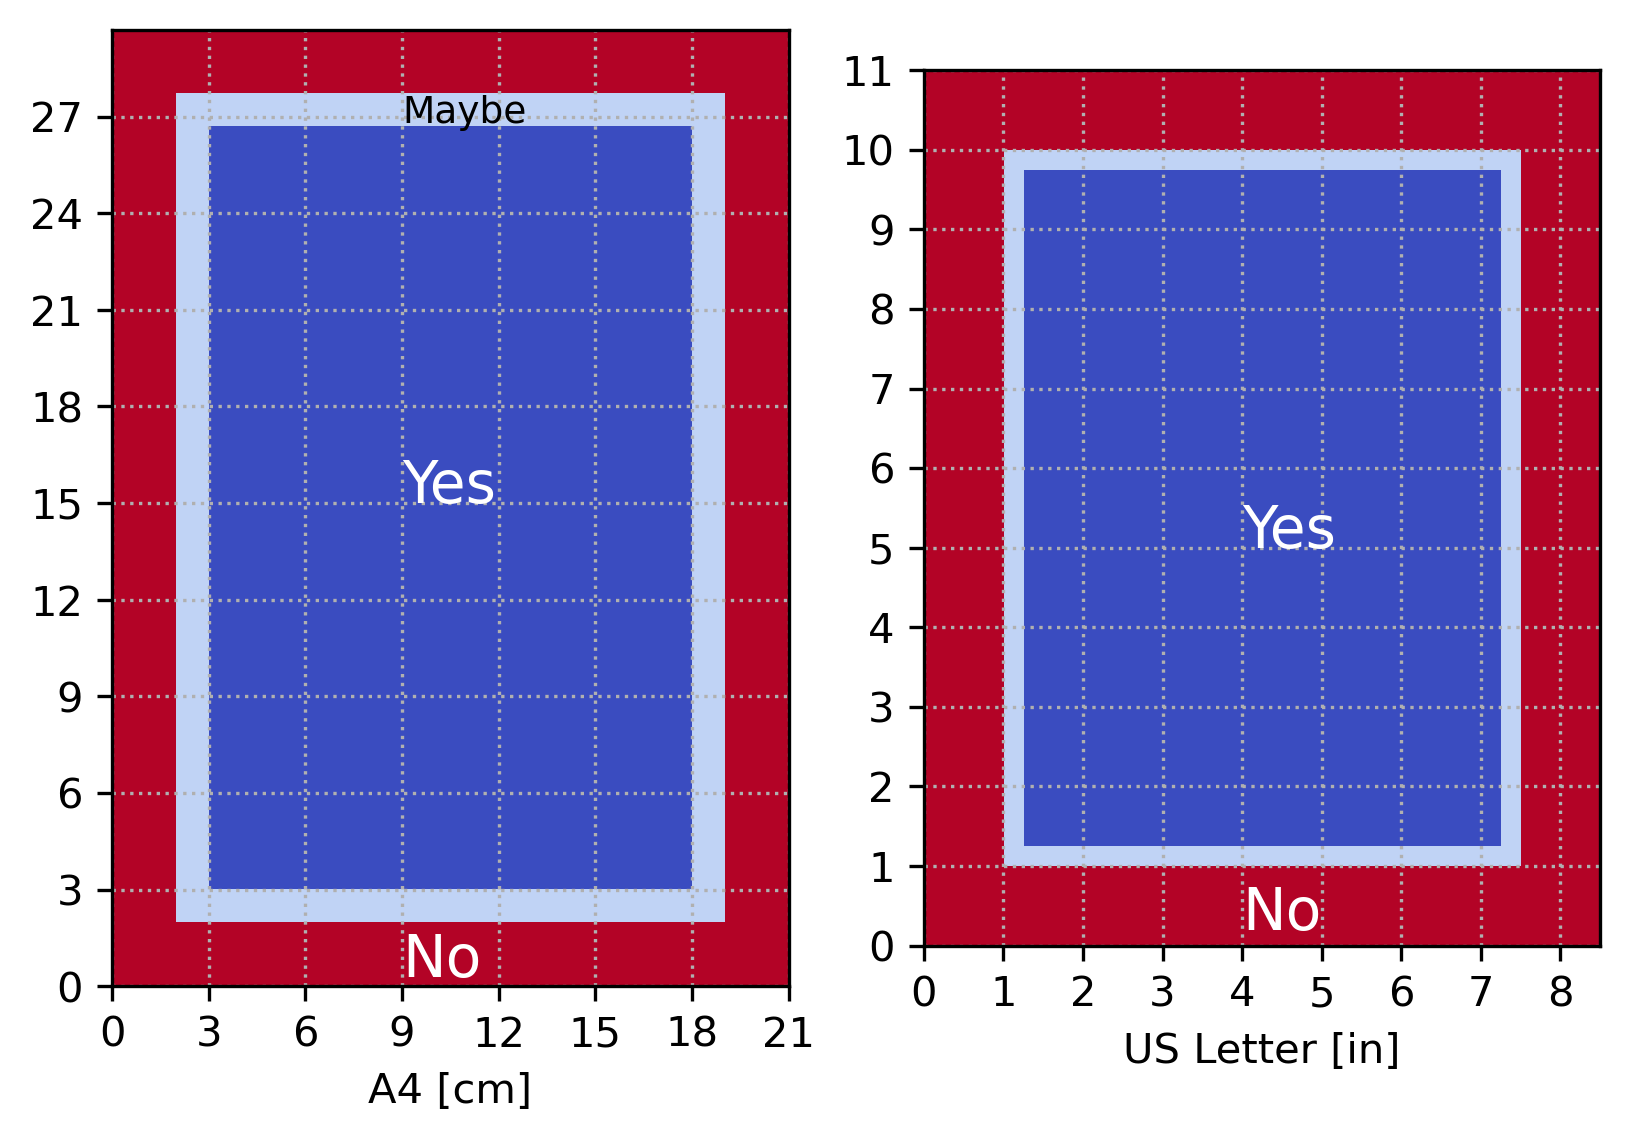

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
%matplotlib inline

A4 = np.ones((297,210))
ltr = np.ones((44,34))

A4[20:-20,20:-20]=0.4
ltr[4:-4,4:-4]=0.4

A4[30:-30,30:-30]=0.0
ltr[5:-5,5:-5]=0.0

# I always have to remind myself: arrays are assigned down and across,
#   but extent is [left, right, bottom, top]
fig,(ax1,ax2) = plt.subplots(ncols=2, dpi=300)
ax1.imshow(A4,cmap=plt.colormaps['coolwarm'],extent=[0,21,0,29.7],
           aspect='equal')
ax1.set_xlabel('A4 [cm]')
ax1.set_xticks(np.arange(0,22,3))
ax1.set_yticks(np.arange(0,30,3))
ax1.grid(visible=True, which='both',axis='both',linestyle=':')
ax1.text(9,15, 'Yes',color='w',fontsize=14)
ax1.text(9,26.8,'Maybe',color='k',fontsize=9)
ax1.text(9,0.3, 'No',color='w',fontsize=14)

ax2.imshow(ltr,cmap=plt.colormaps['coolwarm'],extent=[0,8.5,0,11],
           aspect='equal')
ax2.set_xlabel('US Letter [in]')
ax2.set_xticks(np.arange(0,9))
ax2.set_yticks(np.arange(0,12))
ax2.grid(visible=True, which='both',axis='both',linestyle=':')
ax2.text(4,5, 'Yes',color='w',fontsize=14)
ax2.text(4,0.2, 'No',color='w',fontsize=14)
plt.show()
#Note to self, might need tensorflow for image to numpy array imports
# --> see https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/

The editors will typically request high-resolution (300 dpi) figures separately from the compiled publication file. Preferred formats vary by journal. A few common formats that Matplotlib supports include PDF, PS, EPS, PNG, and JPG/JPEG
- **Recommended: PDF.** Every major OS comes with a PDF viewer, and PDF images scale well.
- PS and EPS are listed as some journals' top format choices, but these formats require special viewing software and may not support transparency.
- PNG is Matplotlib's default format. PNGs are usually accepted but discouraged due to their large size.
- JPG/JPEG images are economical in computing resources, but images saved in this format degrade when edited or resized.

Other desirable formats like TIFF and SVG are not supported natively but can be used with the installation of the `Pillow` module. [Matplotlib has a tutorial here on importing images into arrays for use wth `pyplot.imshow()`.](https://matplotlib.org/stable/tutorials/images.html) More on this module in the 2nd session.

Matplotlib uses a default resolution of 100 dpi and a default figure size of 6.4" x 4.8" (16.26 x 12.19 cm). The inline backend in Jupyter uses an even lower-res default of 80 dpi.
- You may want to set `dpi=300` in `plt.figure()` or `plt.subplots()` (not a a valid kwarg in `plt.subplot()` singular) at runtime, in `plt.savefig()` or `plt.imsave()`, or if you want to apply it for all figures in your current session, set `mpl.rcParams['figure.dpi'] = 300`.
- The `figsize = (i,j)` kwarg in `figure`, `subplots`, `savefig` and `imsave` also lets you adjust the figure size and aspect ratio, though you'll have to do some conversions if you want to work in metric units or pixels.

### Font
Most journals also regulate the minimum size of font for axis labels and annotations, either explicitly or via revision requests from the editorial department. 
* That floor is usually 9-10 pt (3-3.5 mm, or 0.75-0.8 REM).
* However, **11-14 pt fonts are preferred,** and you should favor larger text when possible for accessibility.

No consensus on whether serif (e.g. Times New Roman, Georgia, Palatino) or sans serif (e.g. Arial, Helvetica, Verdana) fonts are better for readability (you will find researchers on both sides claiming the matter is settled in their favor). Familiarity is more important.
* My advice: Matplotlib's default font (usually DejaVu Sans) is similar enough to the most popular fonts to be a safe choice.
* **Be consistent** - if you're using software other than Matplotlib for some of your figures, make sure the font is the same. The following commands will help:

In [245]:
import matplotlib as mpl
### To select a sans-serif font:
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### To select a serif font:
#mpl.rc('font',**{'family':'serif','serif':['Liberation Serif']})
### To ensure correct typesetting of variables and math scripts
mpl.rc('text', usetex=True)

### To reset to defaults:   
mpl.rcParams.update(mpl.rcParamsDefault)

#### **Matplotlib and LaTeX**
Most journals expect that you typeset all variables and math scripts so they appear the same in your plots and main text $\to$ need a LaTeX distribution installed, and to know some basic syntax:
- LaTeX typesetting happens only within strings, and commands or command sequences must be bracketed with dollar signs (`'$ $'`)
- Most functions that modify characters' sizes, positions, and/or surrounding markings only take arguments in curly braces (`{}`) and will raise an error if the braces are missing. 
    - <span style="color:silver">A few, like superscript (`'^'`) and subscript (`'_'`) will work, but only on the first character after the operator if the braces are omitted.</span>
    - <span style="color:silver">Commands that take >1 arg may use extra pairs of curly braces (e.g., `'$\frac{}{}'`) or a pair of square brackets (e.g., `'$\sqrt[n]{}$'` where *n* is an optional argument for rendering an nth root) - see documentation.</span>
- In most STEM journals, variables are conventionally *italicized*, but descriptive subscripts and superscripts are not. To remove italics from super-/subscripts, enclose the text in `'\mathrm{}'` and wrap the whole expression in the curly braces after the superscript or subscript operator. 
- Documentation of all the Greek letters, operators, and other LaTeX math functions you might need can be found [at this wiki book link](https://en.wikibooks.org/wiki/LaTeX/Mathematics#Symbols).

Unfortunately, Matplotlib needs some cajoling to work with LaTeX.
- In `str.format()`, **all** curly braces (`{}`) associated with LaTeX commands must be doubled (`{{}}`), including nested braces. An odd-numbered set of nested curly brace pairs will be interpreted as a site for string insertion.
- Many characters also require the whole string to have an r (for raw input) in front of the first single- or double-quote, like $\times$ (rendered as `'$\times$'`), $\pm$ or $\mp$(rendered as `'$\pm$'` and `'$\mp$'` respectively), or most Greek letters.
- Most basic operator symbols (+, -, /, >, <, !, :, |, \[\], ()) can be used as-is, but some that have functional meanings in LaTeX, Python, or both (e.g. \$ and \%) must be preceded by a single- (LaTeX command symbols only) or double-backslash (\\\\) to escape their typical usage.
- Spaces within any character sequence between two `$`s are not rendered; they only exist to separate alphabetic characters from commands. You can insert a space with `\;` if you don't want to split up the LaTeX sequence to add spaces.

**Example:** Let's say you've measured some initial velocity, denoted `v_init` in your code, with a magnitude of 15.1 m/s, and it has an asymmetric uncertainty of `error_arr=[-0.4,0.3]`. If you then wanted to annotate a relevant figure with $|\overrightarrow{v_{\mathrm{init}}}|\;=\;15.1^{+0.3}_{-0.4}\;\mathrm{m\cdot s}^{-1}$, the format string would look like this (all on one line):
    `r"$|\overrightarrow{{v_{{\mathrm{{init}}}}}}|\;=\;-{:.1f}_{{{:.1}}}^{{+{:.1}}}\;\mathrm{{m\cdot s}}^{{-1}}$".format(v_init,*error_arr)`

Note that you *can* use string insertion inside of formatting operators like the super- and subscript commands.

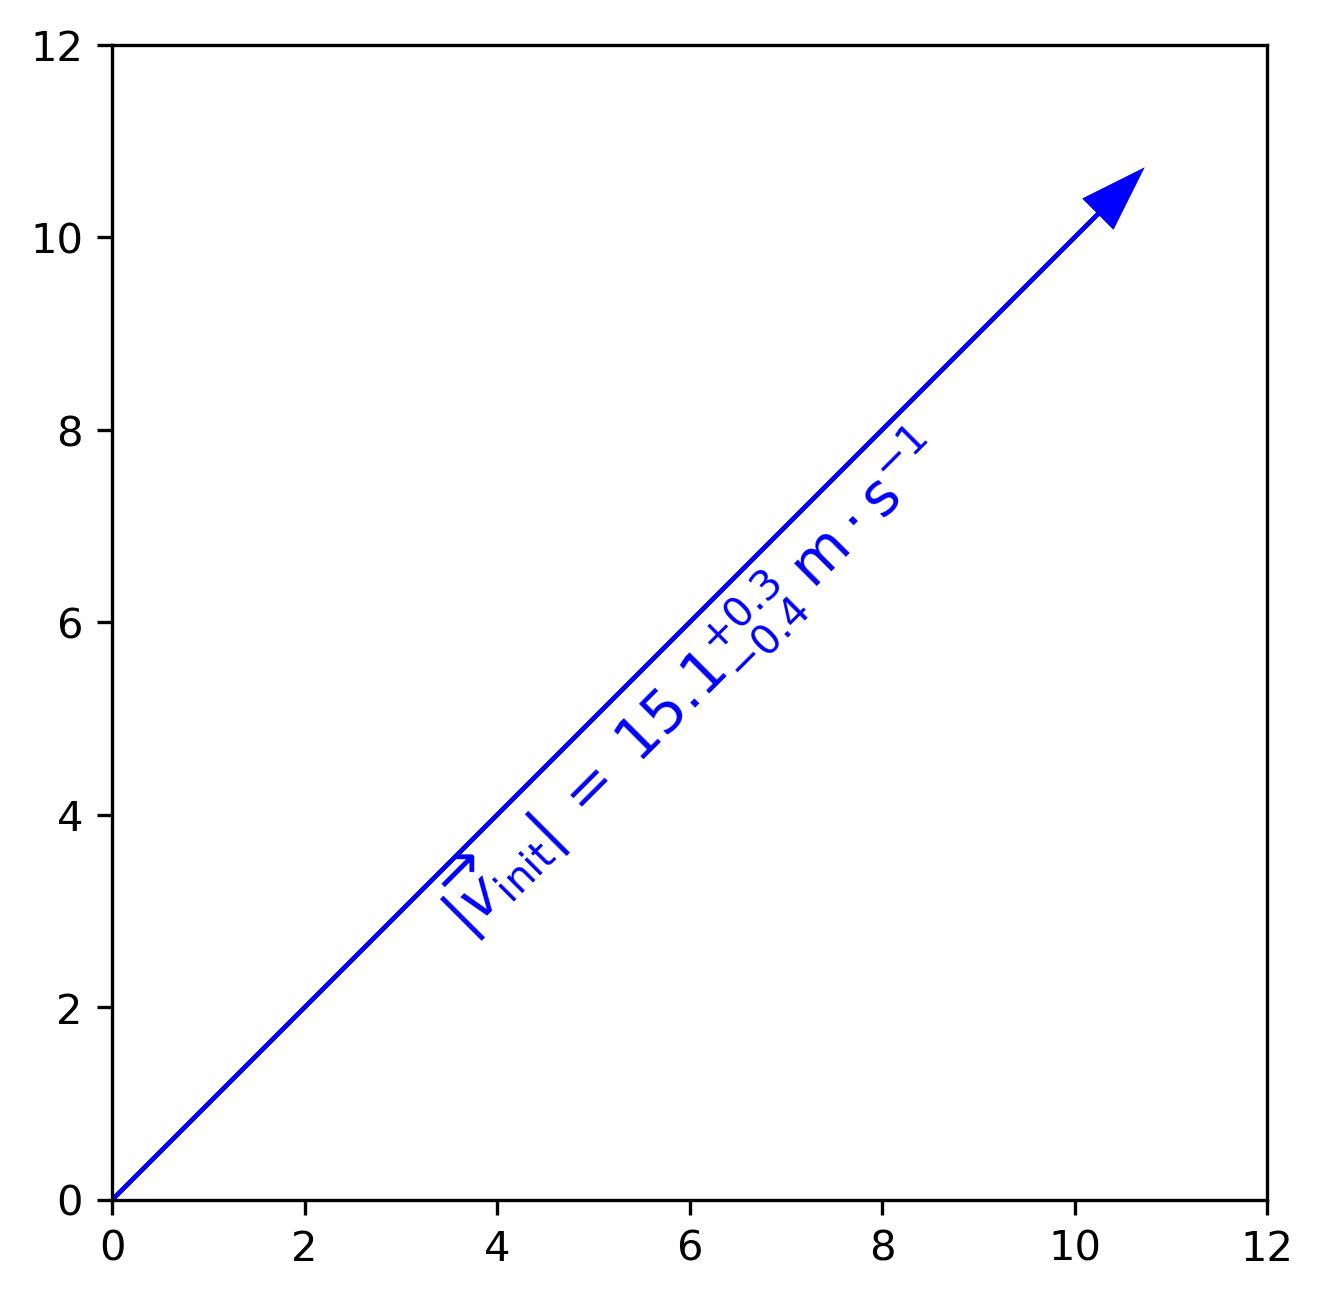

In [3]:
v_init=15.1
error_arr=[-0.4,0.3]
fig,ax=plt.subplots(dpi=300,figsize=(5,5))
ax.set_aspect('equal') #arrowheads will slant if axes are not equal
ax.arrow(0,0,10.68,10.68,length_includes_head=True,color='b',
         head_width=0.4)
ax.text(6, 5.4, r"$|\overrightarrow{{v}}_{{\mathrm{{init}}}}|\;=\;{:.1f}_{{{:.1}}}^{{+{:.1}}}\;\mathrm{{m\cdot s}}^{{-1}}$".format(v_init,*error_arr),
        ha='center',va='center',rotation=45.,size=14, color='b')
# ax.annotate('',xy=(10.68, 11.68), xytext=(0,1),
#             arrowprops=dict(arrowstyle="->"))
#annotate does not seem to have a working color kwarg of any kind
ax.set_xlim(0,12)
ax.set_ylim(0,12)
plt.show()

### Axis Ticks, Labels, Scales, and Grids
#### **Axis Ticks:**
Matplotlib's current default is outward-pointing ticks on the left and bottom, but ticks on all sides are preferable for readability.

- *Inward-pointing ticks on all sides:* older standard, still looks best for data that rarely approaches the axes. Since default tick direction is outward, code is:

    `ax.xaxis.set_tick_params(direction='in', which='both')`
    `ax.yaxis.set_tick_params(direction='in', which='both')`
    
    `ax.tick_params(axis='both', which='both', top=True, right=True)`
- *Outward-pointing ticks on all sides:* rising preference, best for images and plots where data can obscure interior axes ticks. To build on Matplotlib's default, code is:

    `ax.tick_params(axis='both', which='both', top=True, right=True)`
- *Regardless:* be consistent throughout your paper!
- If one of your axes is a variable that is very often expressed with a different metric (e.g. spectra are plotted w.r.t. wavelength and frequency almost equally often), expect a referee to request that on a second axis.

#### **Axis Tick Labels and Scales:**
You may need to modify the auto-generated tick labels and locators, or set them entirely by hand, if you want to have:
- Units with special formats or symbols (e.g. dates and/or times, currencies, coordinates, etc.)
- Irrational units (e.g. fractional multiples of $\pi$ or $e$)
- Qualitative variables (e.g. countries, species, relative size categories, etc.)
- Axis tick labels centered between major ticks
- Secondary axes that are transformations of the primary axes
- Scale spacing that is neither linear nor logarithmic (e.g. squared or square root scaling)
- Log-scaling with labels on every decade and visible minor ticks over >7 decades

on one of more of your axes, or if you want any of the above on a colorbar.

Matplotlib has ample support, templates, and [explicit demos](https://matplotlib.org/stable/gallery/ticks/index.html) for the first four of those situations, so I will focus on the last three where the documentation is not as good.

Also note that Matplotlib natively supports `symlog` (symmetric log) scaling and labels, which allows logarithmic axis scaling for both positive and negative numbers, as well as the similar-looking `asinh` scaling. Of these, `asinh` is preferred because it is smooth for all values, whereas `symlog` uses a combination of linear and log transformations that introduces a pair of discontinuities where the regimes change.

Some tick locator functions are tricky to use. In `mpl.ticker.LogLocator()` for example, if you set `numticks` too low or don't include it, the whole line is ignored or the axis is blanked depending on where you put the command. Here's a more realistic code snippet (set after plot and axis scaling) than what appears in the official documentation, which ensures there are visible major ticks on decade and visible minor ticks every quarter of a decade:
`ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10,numticks=99))`
`ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10.0,subs=(0.25,0.5,0.75),numticks=99))`
`ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())`

Adding a secondary axis that is a transformation of a primary axis requires both the forward and reverse of the transformation as inputs into the `functions` kwarg. Once the 2nd axis is assigned to a variable, it can be modified like any primary axis.

The following example demonstrates both `LogLocator()` and `ax.secondary_xaxis('top', functions=(prim2sec,sec2prim))`:

Text(0, 0.5, 'Intensity [W(m$\\cdot$sr$\\cdot$nm)$^{-1}$]')

C:\Users\rlore\AppData\Local\Temp\ipykernel_14196\2097245131.py:19: RuntimeWarning: divide by zero encountered in true_divide
  lambda x: 0.001*c/x))


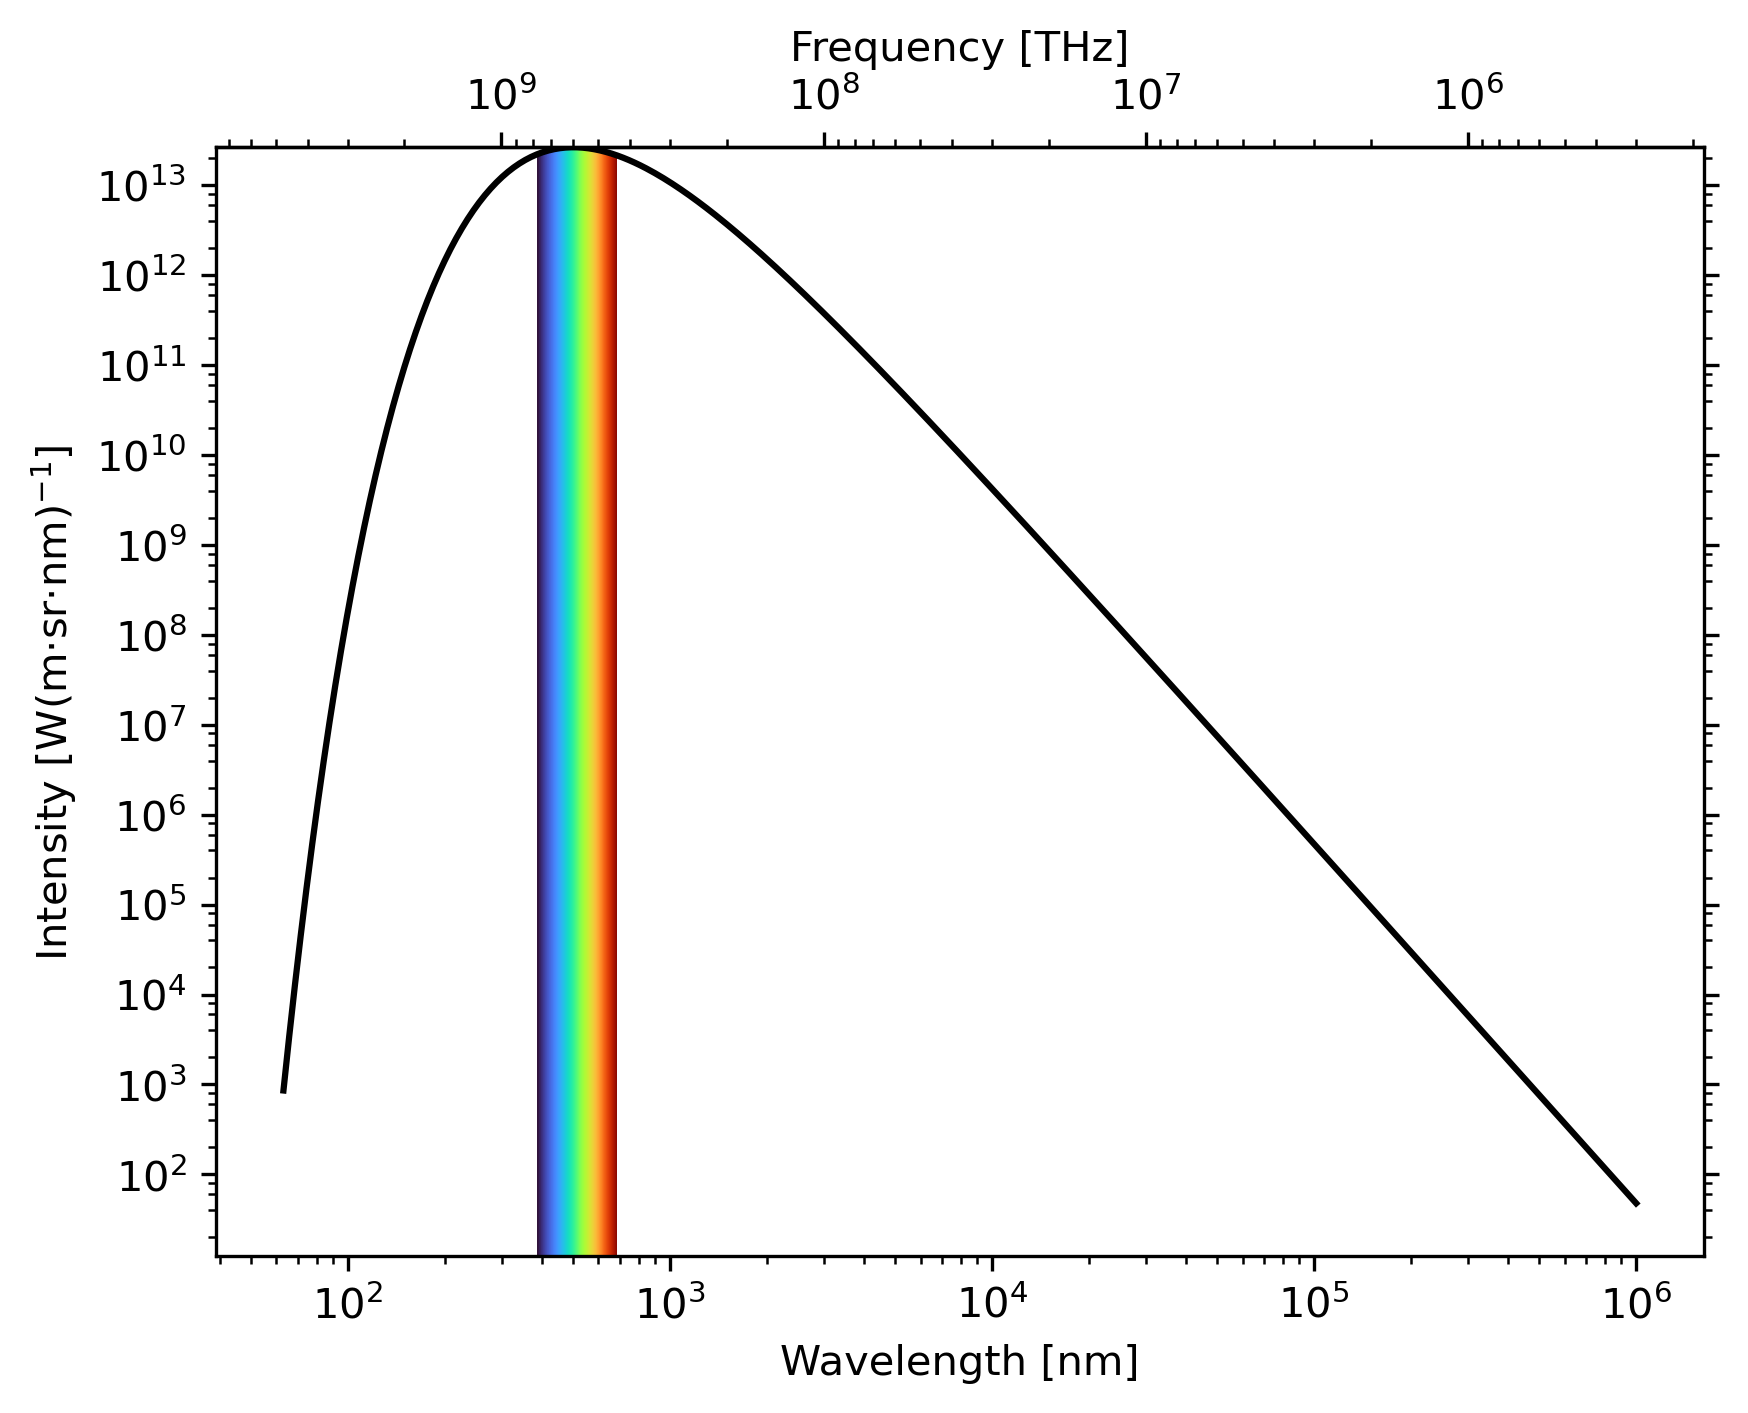

In [8]:
#let's plot a blackbody curve for the temperature of the sun
# as a function of wavelength
c = 2.998*10**8.
k_b = 1.380649*10**-23.
hc = (2.998*10**8.)*(6.626*10**-34.)
def bb(wvl,T):
    return ((2*hc*c)/(wvl**5)) * 1/(np.exp(hc/(wvl*k_b*T)) - 1)

wvs = np.logspace(-7.2,-3.0,471)
bb5777 = bb(wvs,5777.)

import matplotlib as mpl
import matplotlib.ticker as ticks
fig, ax = plt.subplots(dpi=300)
ax.plot(wvs*10**9,bb5777,'k-')

# 1 nm = 10^-9 m, 1 THz = 10^12 Hz
secax = ax.secondary_xaxis('top',functions=(lambda x: 1000*c/x,
                                            lambda x: 0.001*c/x))
#1st func. is primary-to-secondary
#2nd func. is secondary-to-primary

# This part is just for context, to highlight visible light wavelengths
poly=ax.fill_between(wvs[np.where(np.logical_and(wvs>3.8*10**-7,wvs<7*10**-7))]*10**9,
                bb5777[np.where(np.logical_and(wvs>3.8*10**-7,wvs<7*10**-7))],
                color='none') #mark off polygon to fill later
verts = np.vstack([p.vertices for p in poly.get_paths()])
gradient = plt.imshow(np.linspace(0,1, 256).reshape(1, -1),
                      cmap=mpl.colormaps['turbo'], aspect='auto',
                      extent=[verts[:, 0].min(), verts[:, 0].max(),
                              verts[:, 1].min(), verts[:, 1].max()])
gradient.set_clip_path(poly.get_paths()[0], transform=plt.gca().transData)
# I just copied this ^ so my understanding of it is fairly superficial

ax.set_xscale('log')
ax.set_yscale('log')

# PAY SPECIAL ATTENTION TO THE NEXT 4 LINES
ax.yaxis.set_major_locator(ticks.LogLocator(base=10,numticks=99))
ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
ax.yaxis.set_minor_formatter(ticks.NullFormatter())
ax.tick_params(axis='y',which='both',right=True)
#  Must have `numticks` $\ge$ the *total* number of major or minor axis
#ticks needed to span the axis, or the whole line will be ignored.
#  For minor ticks, include `subs` kwarg & list increments between major
#ticks where you want minor ticks to be marked, *excluding endpoints*.
#Note that `subs` only spans 2 major axis ticks, while `numticks` must be
#enough to span the entire axis.
#  The last line invoking the `NullFormatter()` turns off labels
#for minor ticks (otherwise all ticks are labeled so none are legible).
#ax.grid(True,which='major',axis='y', zorder=0)
ax.set_xlabel('Wavelength [nm]')
secax.set_xlabel('Frequency [THz]')
ax.set_ylabel('Intensity [W(m$\cdot$sr$\cdot$nm)$^{-1}$]')

For colorbars, there are 2 ways to set the ticks and tick labels: 
- with the `ticks` and `format` kwargs of `colorbar()`, or 
- by setting them afterward with `[cbar].set_ticks()`, where `cbar` is the name of the colorbar instance.

The latter only takes fixed ticks, but in the former, the `format` kwarg takes all the same locator functions that `ax.[x|y]axis.set_[major|minor]_locator()` does, so I will cut this section short and refer viewers to [Matplotlib's colorbar tick labelling demo.](https://matplotlib.org/stable/gallery/ticks/colorbar_tick_labelling_demo.html)

#### **Grids:**
Grids are usually omitted (often for proprietary reasons), but should be included in a light, neutral, unobtrusive color *if* the coordinate system is distorted, slanted (non-orthogonal), or rotated relative to the displayed bounding box.

**Example:** For regular plots and plots with axis transforms specified, `ax.grid(True, linestyle=':', color='silver')` turns the grid on, sets the linestyle to dotted (default is solid) and colors the lines CSS4/X11 silver (default is a slightly darker grey).
- Most matplotlib modules that support non-Cartesian coordinate grids display grids by default, including polar and `axes3d` plots.
- Skewed, rotated, or spherically distorted coordinate systems usually require imported module packages that are specific to your field (e.g. `AstroPy` has the `wcs.WCS` module that you can set as an axis transformation directly), so I consider that outside the scope of this tutorial.
- New distributions incorporate `matplotlib.projections.geo`, which includes support for Aitoff, Hammer, Lambert, and Mollweide axes projections, as well as a customizable `GeoAxes` base class, but the documentation has not caught up. Grids seem to be visible by default.

If you decide you need to show a grid, keep your typical data format in mind - try to choose grid line styles that are distinct from your data.
- **Images or 2D histograms:** choose a contrasting color, and consider dotted lines to make the grid less prominent. The grid is usually held on top by default, and in these cases, leave it.
- **Scattered data:** choose light, thin, solid lines in a neutral color. Default style is good here, but if figures are online-only, you could use other styles with white grids on a grey or black background (e.g. `plt.style.use('seaborn')`). Set `zorder=0` to put the grid behind your data if the data are sparse.
- **Lines, bars, and stems:** choose light, thin lines in a neutral color; dotted line style preferred unless there are dotted lines or scattered data also on the plot - then choose solid. In these cases, it usually looks best to keep the grid behind your data by setting `zorder=0`. For bar plots, keep in mind that it only makes sense to turn on gridlines perpendicular to the bars (i.e. set the `axis` kwarg in `grid` to `y`)

### <span style="color:red">Col</span><span style="color:darkorange">ors</span> <span style="color:yellow">and</span> <span style="color:springgreen">Col</span><span style="color:dodgerblue">orm</span><span style="color:magenta">aps</span>
I'll refer viewers to [Matplotlib's color specification page](https://matplotlib.org/stable/users/explain/colors/colors.html) for the basics on how to specify marker or line colors once you know which to use. But which to use?

Colorblindness affects about 1/12 men and 1/200 women, so visuals should be made color-blind friendly whenever possible. That said, some colors, especially certain shades of blue and green, may actually be more distinct for some types of colorblindness than for those with full RGB color vision. Sometimes you just have to experiment with colorblindness simulators and palettes.

Several online tools exist to help you check your images for color-blind friendliness:
- https://www.color-blindness.com/coblis-color-blindness-simulator/ allows you to upload images and view them through different filters on the site.
- https://colororacle.org/ is a downloadable app that can filter your whole screen (Appears no longer supported – last release in 2018).
- Coolors.co can help you generate n-color palettes, exports code-friendly dictionaries of hex codes, and has a “glasses” button that lets you view the palette as it would appear to the colorblind. (Drawback: color selection is either random or manual.)

- <span style="color:royalblue">Blue</span> (several will work as long as they aren't too purplish) and <span style="color:darkorange">orange</span>(specifically CSS4/X11 `darkorange` or `tab:orange`) are easily distinguished for all types of color-blindness, so they make the best 2-color palette.
    * <span style="color:silver"> If you only need 5 colors, most of Matplotlib's classic colors with single-letter specifiers are pretty good, but you will have to omit either red or green. </span>
    * <span style="color:silver"> Matplotlib’s built-in Tableau palette is decent if you need more colors, and nicer to look at for those with full color vision, but colorblindness simulators suggest <span style="color:#9467bd">purple</span>, <span style="color:#e377c2">pink</span>, and <span style="color:#bcbd22">olive</span> are especially problematic – each of these three is nearly indistinguishable from another color for *two* types of color-blindness.</span>
![Matplotlib tableau palette](https://matplotlib.org/stable/_images/sphx_glr_named_colors_002_2_00x.png)
    * <span style="color:silver">Tableau published a 10-color palette especially for color-blindness that is slightly better (the last 2 colors would be very hard to see in print), which can be imported with a style file (next section).</span>

- If there are more than 2 sets of data on your plot, using different markers or line-styles for each set of data is strongly advised.
- If color printing costs extra, keep in mind that in greyscale, it is very hard to make >4 colors (>5 if you include black) both dark enough to see easily and distinct enough to tell apart when they aren't side-by-side. You will need to vary line or marker styles as well.

For quantitative color maps, your choices are a bit easier, [and Matplotlib has excellent documentation on how to choose](https://matplotlib.org/stable/users/explain/colors/colormaps.html). In short, consider:
- Monotonicity in brightness (is the transition to dark to light smooth?)
- Dynamic range (how light or dark do the extremes need to be?)
- Should the color map be sequential, diverging, cyclical, or something else?

For **sequential** color maps, you should heavily favor these because they are monotonically increasing in brightness (and cividis is specifically for the color-blind): ![sequential color maps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_008_2_00x.png) As you can see, `'magma'` and `'inferno'` have the largest dynamic range, but the others are more suitable for overlaying black or white markers, text, contours, etc. If you need to overlay multiple colors of markers, lines, or contours, `'gray'` and `'bone'` are also good choices.

For **diverging** color maps, `'coolwarm'`, `'RdBu'`, `'RdYlBu'`, and (surprisingly) `'PiYG'` are the only color maps that simulations suggest won't cause confusion with colorblindness, and vary smoothly both directions to similar extremes of darkness.

There are only 3 choices of **cyclic** color maps, and looking at the plot below, it should be easy to see why `'hsv'` should not be used.
![cyclic cmaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_012_2_00x.png)

Final note: every color map can be reversed in order by adding `_r` to the end of the color map string before the closing apostrophe or quotation mark. E.g. to set the `coolwarm` color map such that higher values are bluer instead of redder, you would set `cmap = 'coolwarm_r'`.

### Putting it all together: rcParams and Style Sheets
An enormous list of plot properties are set behind the scenes by Matplotlib's default runtime configuration parameters, or `rcParams`, including:
- figure size, resolution, aspect ratio, padding, and subplot spacing, set separately for `plt.show()` and `plt.savefig()`
- fonts, font sizes, weights and letter spacing (e.g. monospace)
- marker sizes, colors, fill styles, and the default shape 
- color maps, and color- and line-cycles
- axes tick lengths, widths, colors, visibility, and orientations, set separately for major and minor ticks on each axis
- and SO much more!

Any of these properties can be changed at runtime or in your code to affect every plot afterward until the `rcParams` are changed or reset, or until the kernel resets. [Matplotlib also provides a number of built-in style sheets that can be used to change the defaults, including one that automatically cycles through the Tableau color-blind 10-color palette](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), which you can import via e.g. `plt.style.use('tableau-colorblind10')`

But what if you want to set your own style features and port them around so that you always have the same settings? You can make your own style sheet (or copy a template and modify it)!
- A `.mplstyle` file is just a text file of key-value pairs where each key is the rcParam you want to modify.
- Each style sheet only needs to contain what you want to be different from the defaults.
- You can create and import a list of style sheets, each of which addresses a different set of rcParams.

The `mpl4publication.mplstyle` file attached incorporates most of my suggestions for axes, grids, ticks, font sizes, and color palettes, wherever those suggestions were consistent across different plot types.

If you want to apply a couple of rcParams changes only to a specific plot or set of plots and have the rcParams reset automatically afterward, nest all plots that use the desired rcParams change in a `with` statement using `rc_context()`, as in the following example:

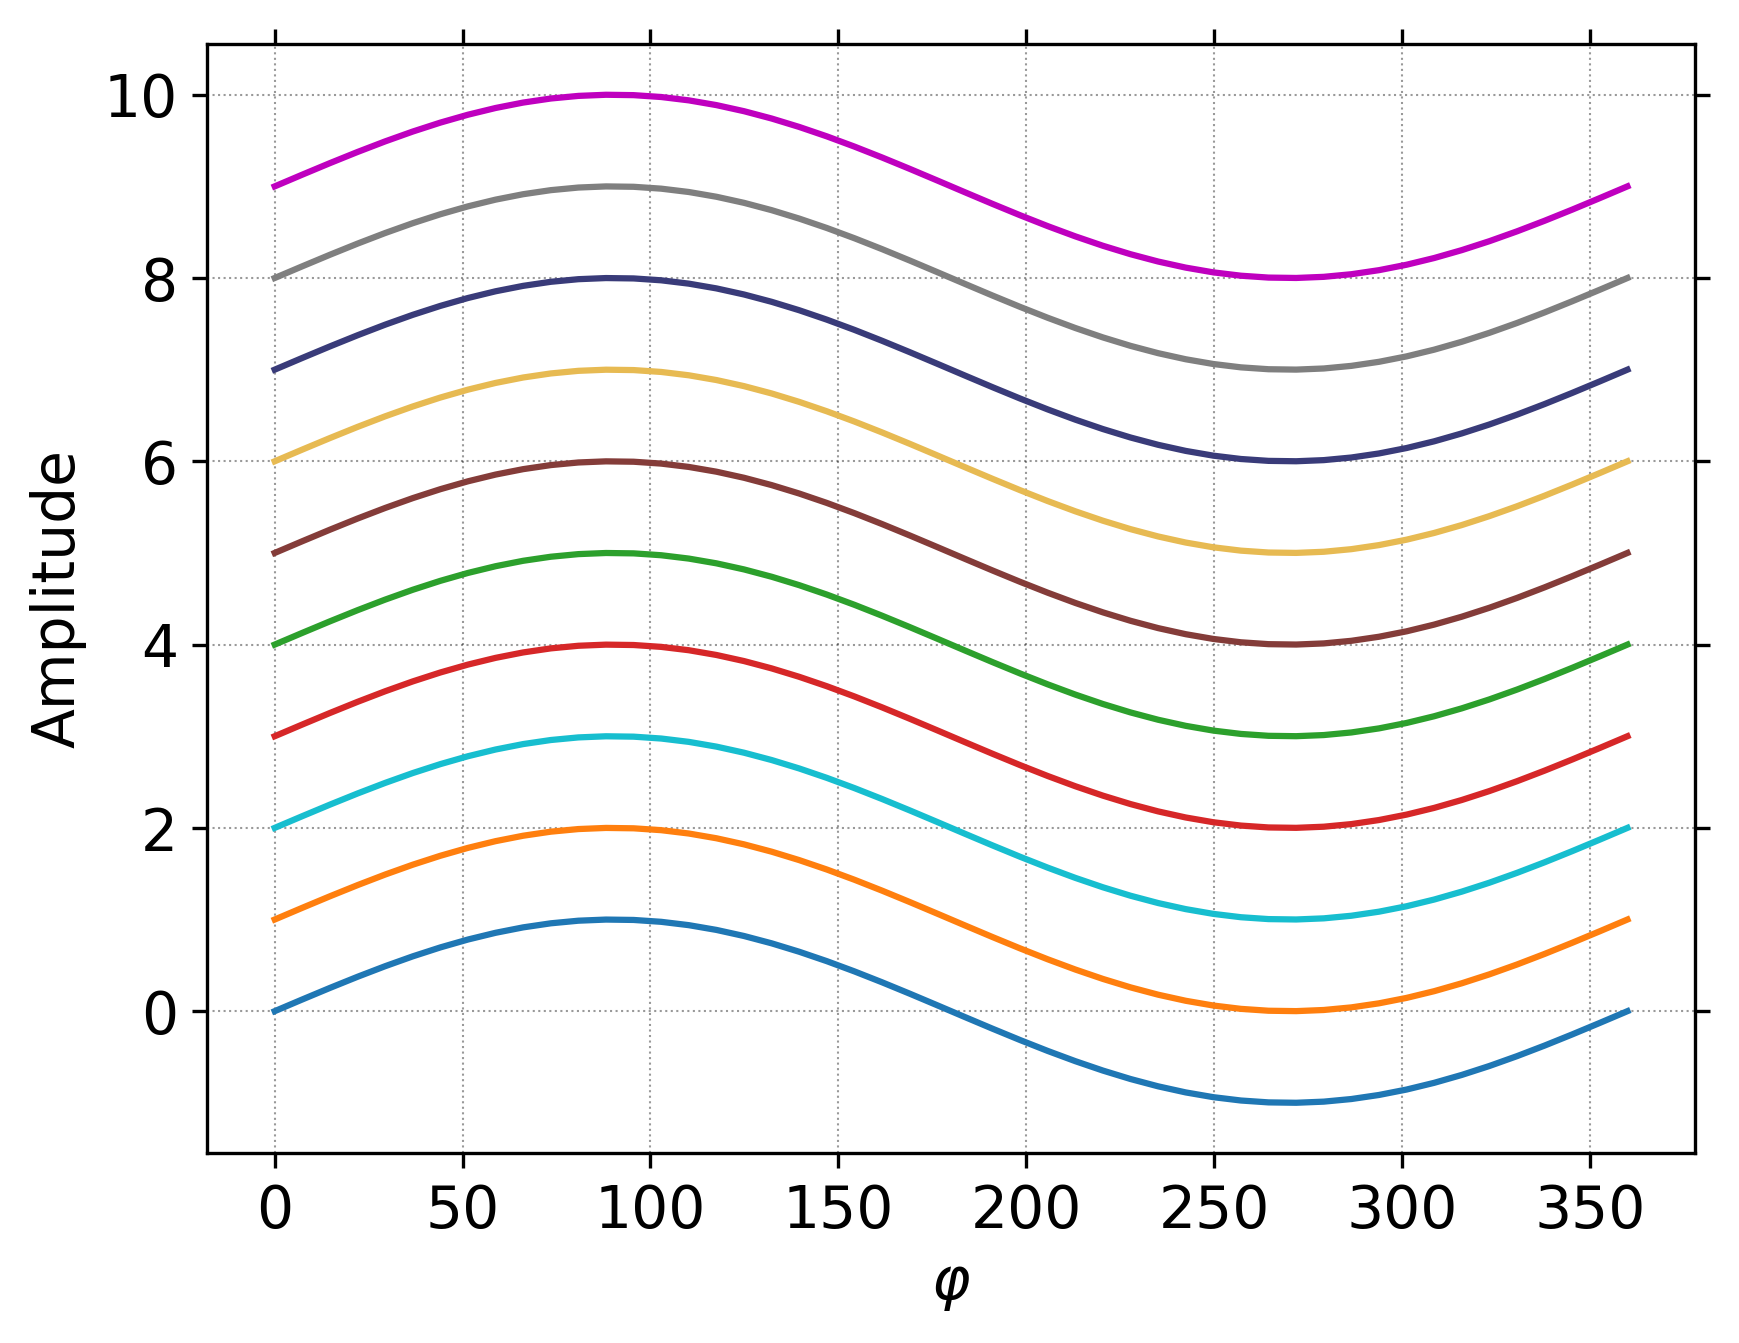

In [28]:
plt.figure(dpi=300)
with plt.style.context('./mpl4publication.mplstyle'): #bmh is a built-in .mplstyle file
    for i in range(10):
        y = i+np.sin(np.linspace(0, 2 * np.pi))
        plt.plot(np.linspace(0,360,len(y)),y)
        plt.xlabel(r'$\varphi$')
        plt.ylabel('Amplitude')
plt.show()

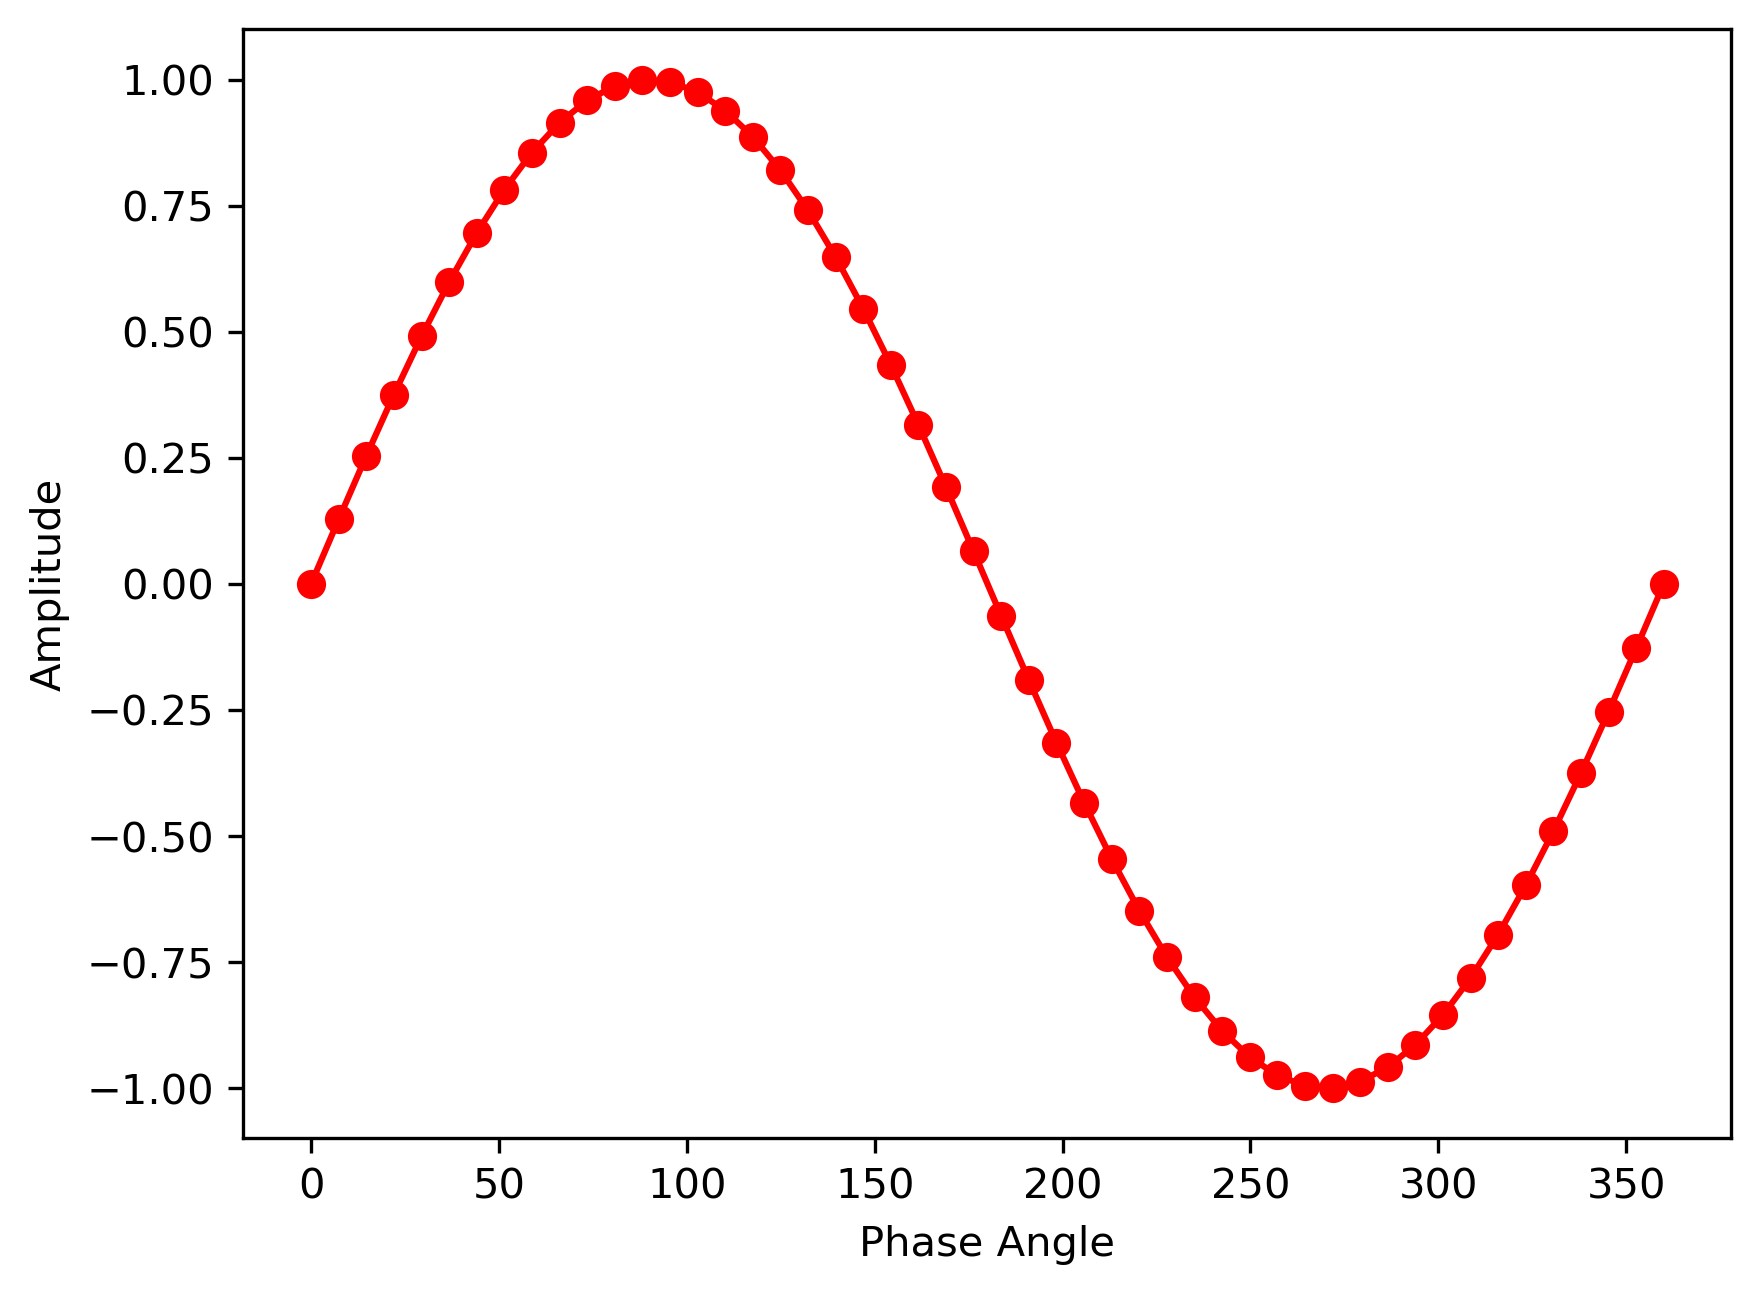

In [18]:
plt.figure(dpi=300)
y = np.sin(np.linspace(0, 2 * np.pi))
plt.plot(np.linspace(0,360,len(y)),y, 'r-o')
plt.xlabel('Phase Angle')
plt.ylabel('Amplitude')
plt.show()

## Choosing a Plot Type
Some types of data have standard representations across most disciplines, such as:
- probabilities (histograms)
- budgets or fractions (proportional area charts, of which the pie chart is both best-known and worst at its job)
- spectra (line plots of measured intensity vs. wavelength frequency, or wavenumber)
- vector fields (quiver plots)
- elevation or intensity over an area (contour plots or heat maps)

Many fields also often have standard ways of representing measurement data produced by the usual tools of their trade.

But often you derive parameters, produce simulations, or otherwise create data with a less obvious choice of representation. Then what?

#### Consider: **(<span style="color:darkorange">Dimensionality</span>, <span style="color:royalblue">Regularity</span>), (<span style="color:lightseagreen">Quantity</span>, <span style="color:crimson">Density</span>)**
In roughly that order.

### <span style="color:darkorange">Dimensionality</span> and <span style="color:royalblue">Regularity</span>
The greatest range of options (hardest choices) come with 3-4 dimensions or parameters. You could... 
- overplot with extra axes
- color-code scatter plot points or PDF bins with a third parameter (example below)
- use different markers, colors, or linestyles for qualitative variables
- have a 3-channel image with contours or markers on top
- etc., etc., etc.

![Fig. 3 from my PhD Omnibus Paper](https://s3.amazonaws.com/aasie/images/0067-0049/256/1/3/apjsac063df3_hr.jpg "Histogram probability distribution function (PDF) of Spearman rank coefficients of correlation between dust temperature (T_dust) and H2 column density (N_H2). The Spearman coefficients themselves correlate with a clump’s T_dust at the position of maximum N_H2 (indicated by the coloration of the bins, where redder bins have higher mean T_dust.)")

Having a slightly larger number of dimensions/parameters can make your choice easier (note: I did not say "less painful"), because:
- Display options that can accommodate all variables are more limited.
- As discussed earlier, ***journals have hard size and resolution limits.***

For 4-6 numerical parameters to scattered data, or if your data include anything from MCMC simulations, your data will usually end up on a corner plot or pair grid, like the examples below:

![Corner Plot](https://corner.readthedocs.io/en/latest/_images/dbd6db2c7599947095ba4a9b2dc2ce265cf26c288a9a5c0accaccb06aed0701f.png "Corner plot from the corner.py documentation")
This is a standard format for plotting the marginal posterior distributions of model parameters that result from MCMC methods, regardless of the size of your parameter space. This is a demo image from the documentation of the **`corner.py`** module, which is a lightweight extra package that depends only on NumPy, SciPy, and Matplotlib.

Even if you don't work with MCMC methods, I recommend this package because it handles both extremely dense concentrations of data and sparse but significant outliers. Note the switch between displaying a contoured histogram and individual points at an internally computed point density threshold. It also has a `hist2d()` submodule so you can use this feature on a more conventional pairwise plot.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


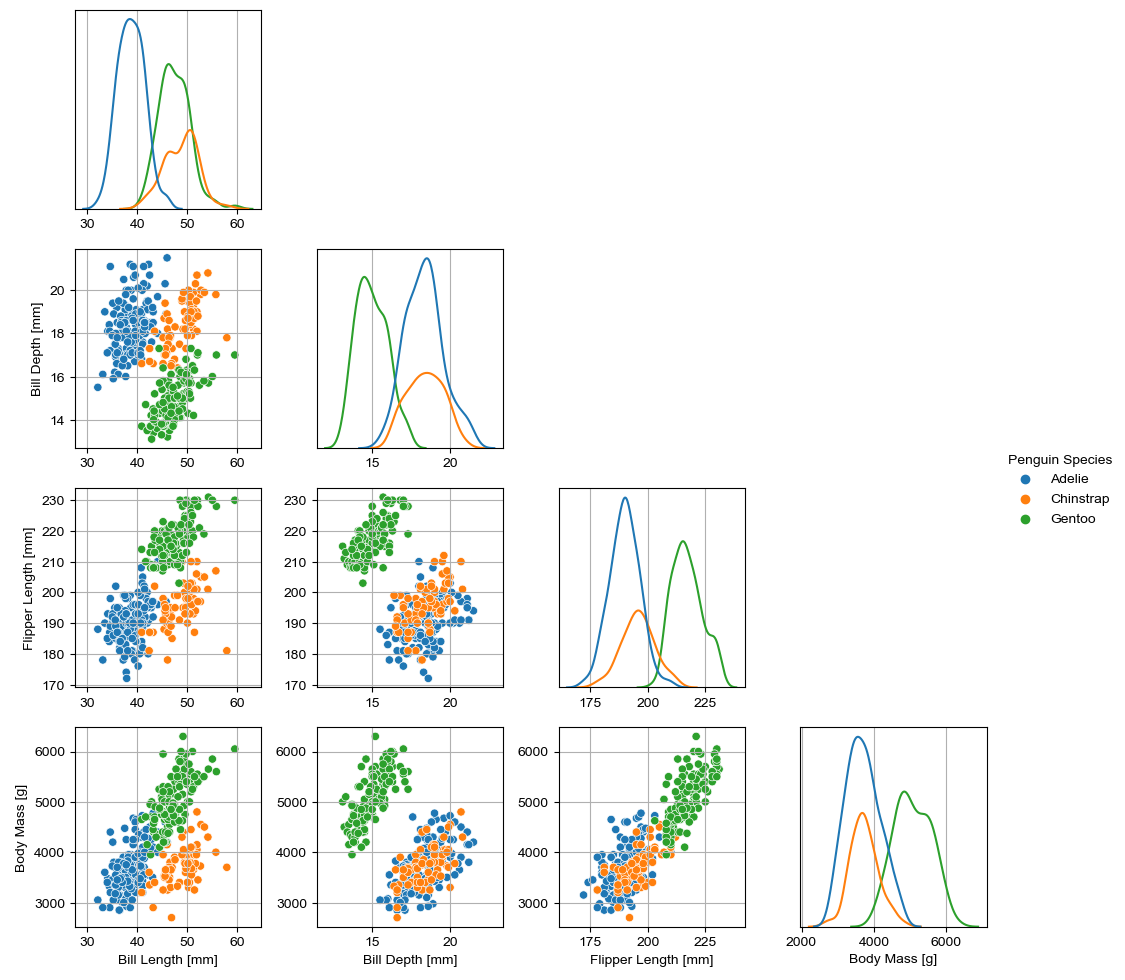

In [9]:
import seaborn as sb
import pandas as pd
import matplotlib as mpl
# I will give a tutorial on Pandas later; the exercise notebooks will have
#   any necessary pandas commands already included
#mpl.rcParams(fontsize=14)

penguins = sb.load_dataset("penguins")
#^this loads a sample dataset from the online repository
# the dataset is a Pandas data frame, which we can preview like so:
print(penguins.head())

g = sb.PairGrid(penguins, hue='species', diag_sharey=False, corner=True,
               despine=False)
# we could also look at sex instead of species
g.map_lower(sb.scatterplot)
g.map_diag(sb.kdeplot)
g.add_legend(title='Penguin Species',loc='center right')#,fontsize=14)
sb.set_style('ticks')

import string
#These commands are just to make the axis labels look better
#  x-axis labels are None except on bottom axis
#string.capwords is better than str.title() because it only capitalizes
#  the first letter after a space, so the units as I've formatted them
#  are ignored
for i in range(4):
    for j in range(4):
        try:
            xlabel = g.axes[i,j].xaxis.get_label_text()
            ylabel = g.axes[i,j].yaxis.get_label_text()
            g.axes[i,j].set_xlabel(string.capwords(xlabel.replace('_',' ')
                                                   .replace('mm','[mm]')
                                                   .replace(' g',' [g]')))
            g.axes[i,j].set_ylabel(string.capwords(ylabel.replace('_',' ')
                                                   .replace('mm','[mm]')
                                                   .replace(' g',' [g]')))
            g.axes[i,j].tick_params(axis='both',
                                    labelleft=True, labelbottom=True)
            g.axes[i,j].grid()
        except AttributeError:
            pass
        
plt.subplots_adjust(wspace=0.3, hspace=0.2)

This plot is produced with the **Seaborn** statistical data visualization package, which I highly recommend, especially if you use Pandas. This Pair-Grid format is great if you have several numerical variables and one very important categorical variable (e.g. species, sex, ticket class, chemical bond type, ...) with no more than a handful of unique values. 

There are many format options for both the single-parameter probability distributions on the diagonal and the joint distributions on the off-diagonals. The downside is that many settings are hardcoded and difficult to change.

#### **Larger-ND Parameter Spaces**
For still-larger parameter spaces ($8\lesssim n_{\rm{dim}}\lesssim30$), even corner plots can quickly become unfeasible. That further reduces your options, and **should raise questions over whether plotting that many variables together is either necessary or desirable.**

If you decide it is necessary, e.g., to show readers how and why you chose a small subset of parameters to study in more detail, you could show a heat map of correlation coefficients in lieu of a more detailed corner plot.

Depending on the format of your data and how much control you want over the appearance of the plot, you could use either Matplotlib's `imshow()` or Seaborn's `heatmap()`.

* `imshow()` gives you more color, text, and other formatting options, and there is [boilerplate code with docstrings in the Matplotlib docs](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) which I've saved to `imshow_heatmap.py` for you to import as part of an exercise.

* If you're familiar with Pandas, computing the correlation coefficients and plotting them with `heatmap()` is more straightforward (see below). But again, you then have to deal with Seaborn's formatting, which is geared more toward digital presentations and infographics than for publication.

98
(33, 33)


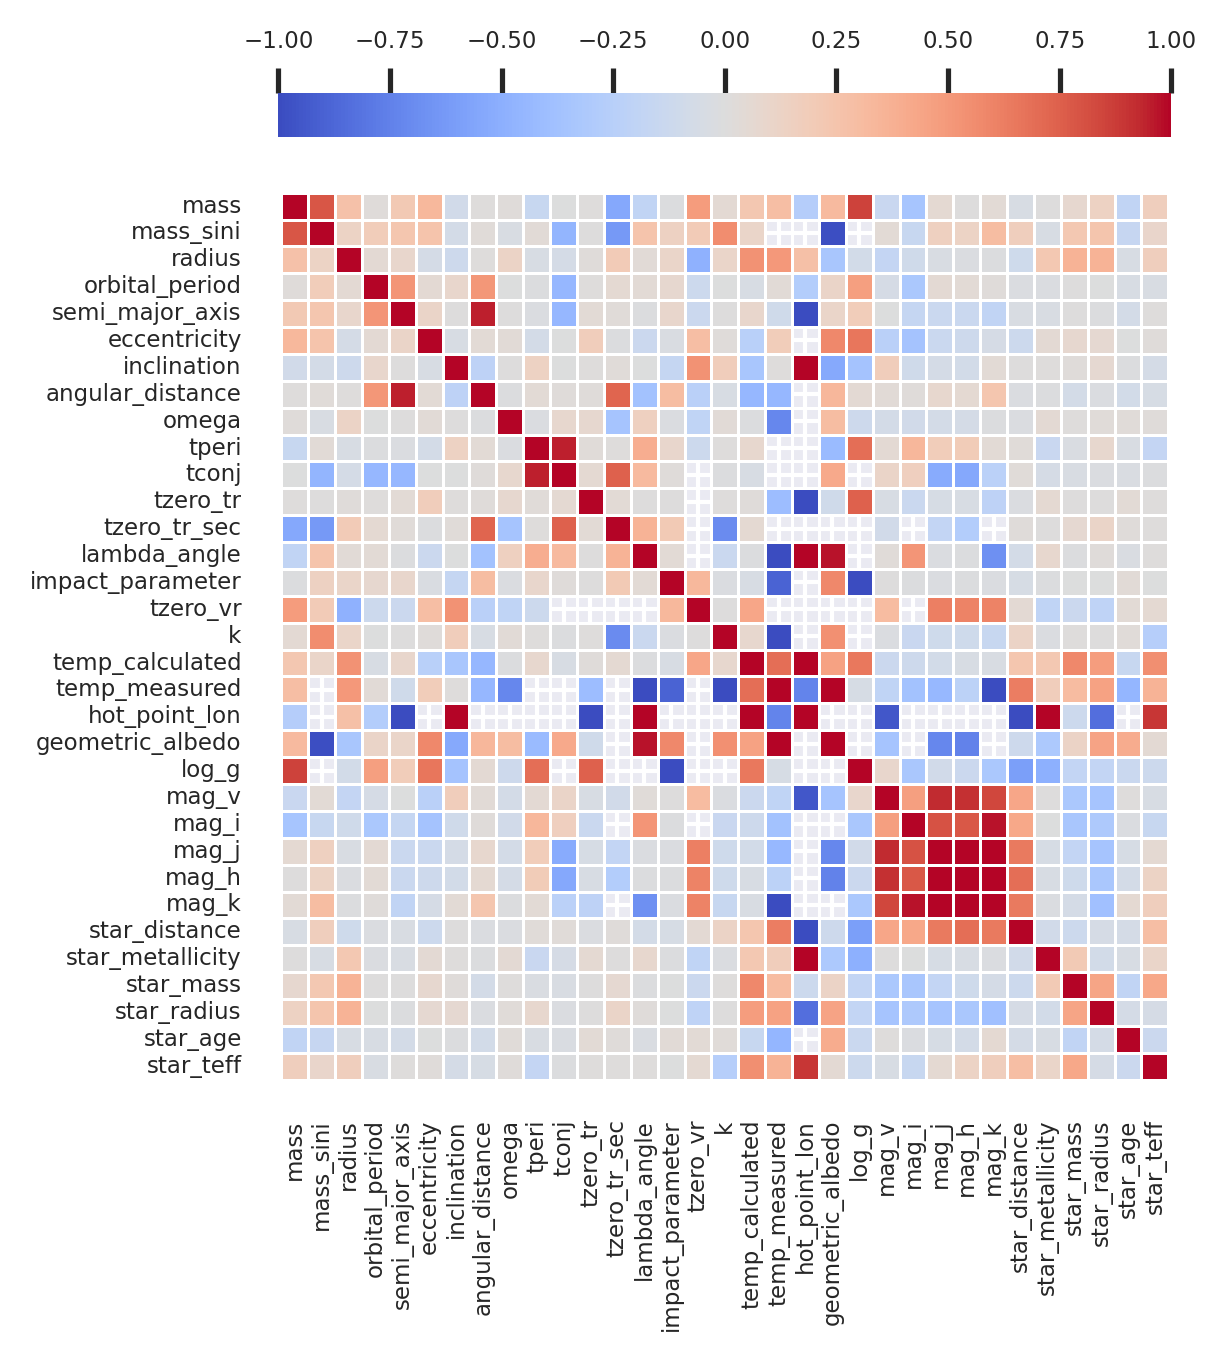

In [68]:
exops = pd.read_csv('exoplanet.eu_catalog.csv')
print(len(exops.columns))
dropkeys = [title for title in exops.columns if
            'error' in title or 'name' in title]
exops1=exops.drop(columns=[*dropkeys,'planet_status','ra','dec',
                           'discovered'])
corrs=exops1.corr(numeric_only=True)
print(corrs.shape)
plt.figure(dpi=300)
sb.set_style('ticks')
sb.set(font_scale=0.5)
sb.heatmap(corrs, cmap="coolwarm", annot=False, linewidth=.3,
           cbar_kws={'shrink':0.6, 'location':'top'},
           xticklabels=True, yticklabels=True, square=True)
plt.show()
#sb.set(font_scale=1)

Either way, this approach also has an upper limit dictated by typical print and font sizes. Given the print guidelines I talked about at the beginning, you will not be able to display more than about 30 parameters. 

You also really *shouldn't* display more than can be shown with the correlation coefficients reported on the squares. A figure as dense as the one above is hard to read without a ruler to help keep your eye on the same line all the way across, and does not allow comparison of parameters with similar correlation coefficients that are not adjacent on the plot.

A plot like the above is best used behind the scenes to help you choose which parameters not to show in publication when you don't already know which are degenerate or which are uninformative to the quantities you care most about.

['tzero_tr', 'tzero_tr_sec', 'tzero_vr', 'mag_v', 'mag_i', 'mag_j', 'mag_h', 'mag_k']
(19, 19)


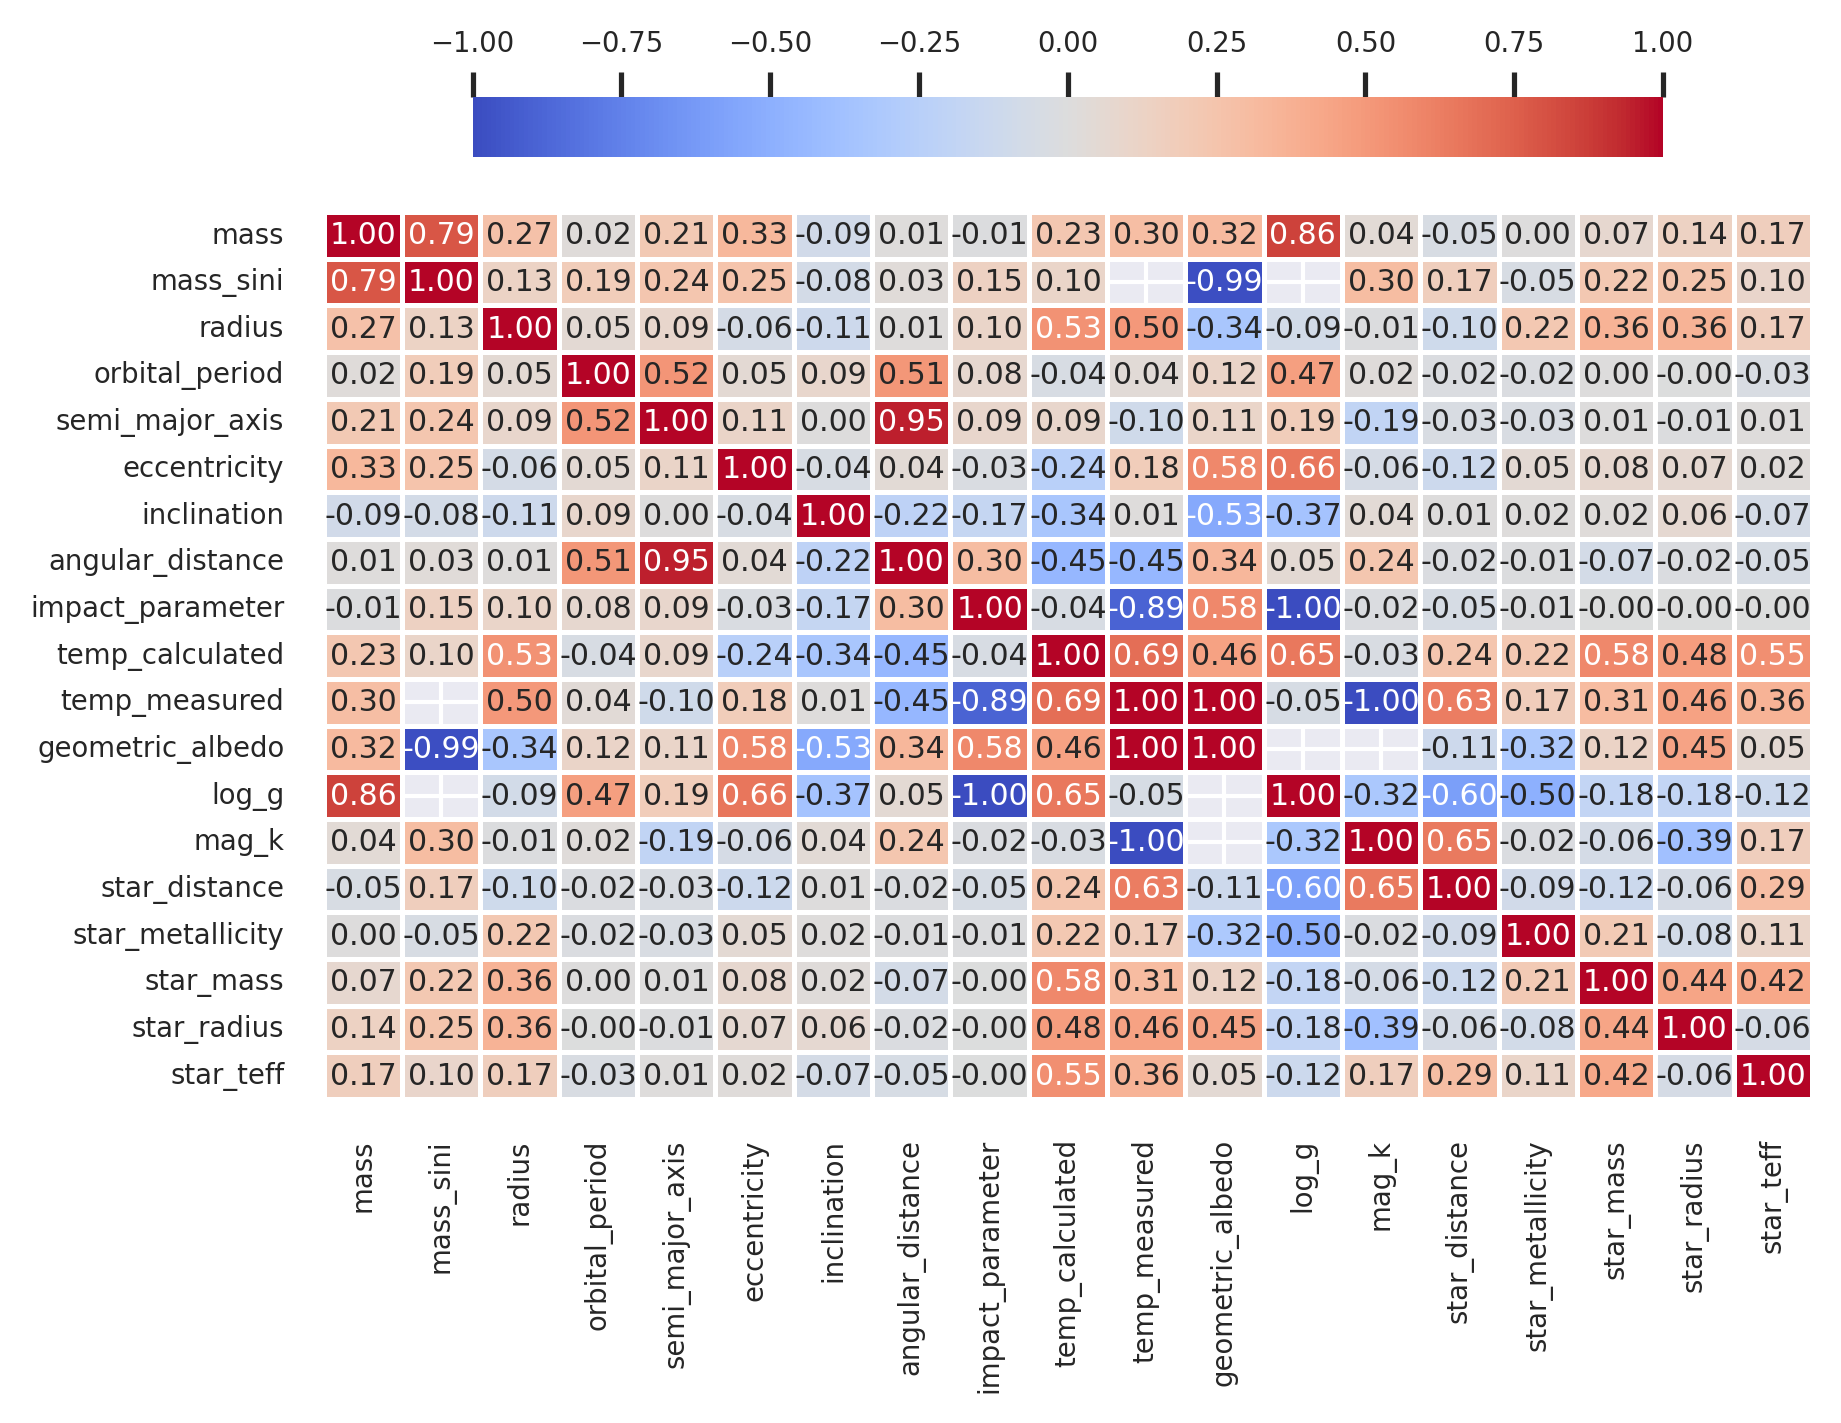

In [70]:
dropkeys2 = [title for title in exops1.columns if
            'tzero' in title or 'mag_' in title]
print(dropkeys2)
exops2=exops1.drop(columns=[*dropkeys2[:-1],'tperi','tconj','omega',
                           'star_age','hot_point_lon','lambda_angle','k'])
corrs2=exops2.corr(numeric_only=True)
print(corrs2.shape)

# annot_labels = np.ma.masked_inside(corrs2.to_numpy(),-0.1,0.1)
# print(annot_labels.shape)
# Plot hearmap with the annotations
plt.figure(dpi=300)
sb.set(font_scale=0.6)
sb.heatmap(corrs2, cmap="coolwarm", annot=annot_labels,fmt='.2f',
           linewidth=0.75, cbar_kws={'shrink':0.8, 'location':'top'},
           xticklabels=True, yticklabels=True, square=False)
sb.set_style('ticks')
plt.show()
sb.set(font_scale=1)

#### **Gridded data**
N-D arrays of values on a regular grid usually imply images, fields, or surface-like formats (2D or 3D projections)
* Challenge for print is mainly finding the clearest, most informative viewing angles or slices and fitting them within your journal's figure limits. I have not found a better method than trial and error.
* For online-only content, interactive or [animated](https://matplotlib.org/stable/gallery/animation/index.html) graphics for 3D or temporally varying data are recommended.
* For quiver and wind barb maps, `plt.quiver()` and `plt.barbs()` take an optional positional argument for color and a `cmap` kwarg if the color arg is the same shape as the 3rd and 4th args. Most good (linear or near-linear) colormaps can make some fraction of arrows/barbs difficult to see. Possible alternatives: 
    - <span style="color:silver">Black or white arrows/barbs on an `imshow()` or `contourf()` plot of the magnitudes of the vectors or a related parameter. Refer to [Lightness of Matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html#lightness-of-matplotlib-colormaps) to find color maps that contrast well with your choice of arrow color. Most colormaps with a low luminosity range trend light (e.g. 'summer', 'coolwarm', etc.), so black arrows tend to work better. Both `imshow()` and `contourf()` also have an `alpha` kwarg to decrease opacity. </span>
    - <span style="color:silver">If you want to color the arrows, you might choose a dark background (not recommended for posters or journals that charge for color prints).</span>
    - <span style="color:silver">Overplot arrows/barbs in a contrasting color on top of open contours, and assign the colormap to the contours, which are somewhat easier to see.</span>

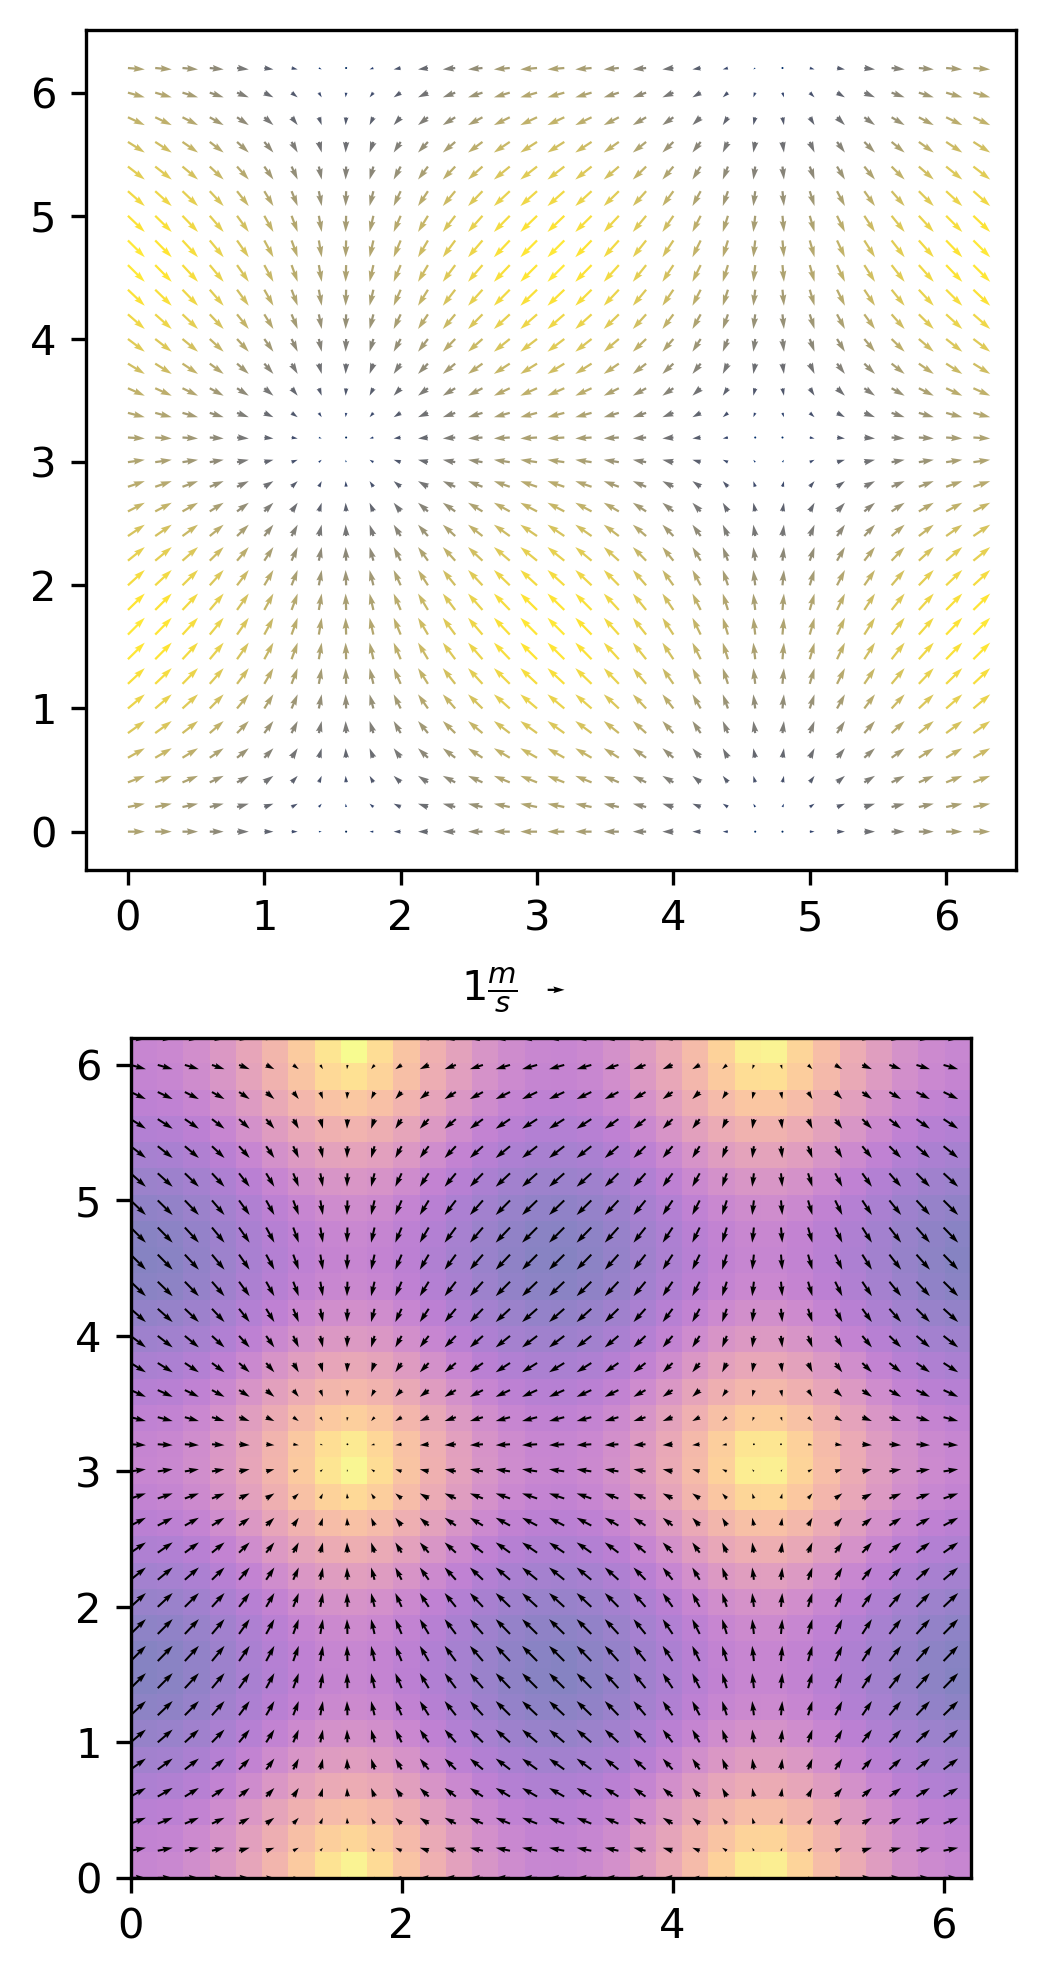

In [70]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
printf(X,Y)
U = np.cos(X)
V = np.sin(Y)

fig, (ax1, ax2) = plt.subplots(nrows=2,dpi=300,figsize=(4,8))
M = np.hypot(U, V)
Q = ax1.quiver(X, Y, U, V, M, #units='xy',  width=0.025,
              cmap=plt.colormaps['cividis'])
qk = ax1.quiverkey(Q, 0.51, 0.48, 1, r'$1 \frac{m}{s}$', labelpos='W',
                   coordinates='figure') #labelpos can be N, E, S, or W
C2 = ax2.imshow(M,cmap='plasma_r',alpha=0.5,
                extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
Q2 = ax2.quiver(X, Y, U, V)#, units='xy',  width=0.025)
plt.show()

There are few options for irregular grids, so I assume for the sake of time that you know which plot type to use if you have, say, a triangular mesh.

### <span style="color:lightseagreen">Quantity</span> and <span style="color:crimson">Density</span>

For most of this segment, I'll assume we're talking about tabular or functional data with no more than a handful of numerical parameters.
- Functional/model data $\to$ usually lines or surfaces
- Measured or derived observational data $\to$ scattered points, histograms, or bars

The most appropriate approach to rendering observational data on a scatter or density plot will depend on the number of data points or lines, how they are distributed across the parameter space, what models or previous results you need to show on the same plot, and *what features you want to emphasize.*

#### **1. Scattered data by the numbers**
- If you have **tens to a few hundred data points**, coloring your data by a third parameter can be a good way to show an extra qualitative dimension (e.g. distinct models) on a 2D plot. Matplotlib’s `scatter()` command has kwargs denoted `c` and `cmap`. `c` takes arrays of the same dimensions as `x` and `y`, and `cmap` lets you specify a color palette if `c` is numerical data.
    * <span style="color:silver">This approach can work with a numerical 3rd parameter, but only if it is strongly correlated with one or both of the axes parameters.</span>
    * <span style="color:silver">If color is used to indicate different data sources or categories, and you have $\lesssim200$ data points, vary the markers as well so the categories will still be distinct to those with colorblindness, or if you expect the article to be printed in greyscale.</span>
- If you have **a few $\times 10^2-10^3$ data points**, consider giving your data some transparency (setting the `alpha` kwarg to between 0 and 1, typically 0.2-0.5) so that dense concentrations of data stand out but outliers remain visible.

- If you have more than a few $\times 10^3$ data points, 2D histograms and (to a lesser extent) contour plots are your friends.
    * <span style="color:silver">If outlying data points can be significant, `corner.hist2d()` (https://corner.readthedocs.io/en/latest/api.html) can switch from showing a contoured 2D histogram to showing individual points below an internally-calculated or user-defined density threshold.</span>
    * <span style="color:silver">If a 2D-histogram with logarithmic binning is appropriate, then outliers will still be visible at roughly the right coordinates (not so with regular binning).</span>
    * <span style="color:silver">Scattered data can be input directly into `hist2d()` or `hexbin()`, but to use `contour() | contourf()`, *you must first compute histograms of the data and input both the bin values and midpoint coordinates into your choice of contour plotting functions.* This is tedious at best and gets tricky in logspace, and the results will not be smooth unless you also do a lot of filtering or resampling with SciPy. Seaborn's `kdeplot()` is a *much* easier alternative since it takes scattered data directly, but you have to know how to handle data frames.</span>
    * <span style="color:silver">Filled contours (`contourf()`) are more intuitive and better if you need to plot linear or scattered data on top.</span> 
    * <span style="color:silver">Line contours are more accurate and better to overlay on images or other continuous 2D distributions.</span>

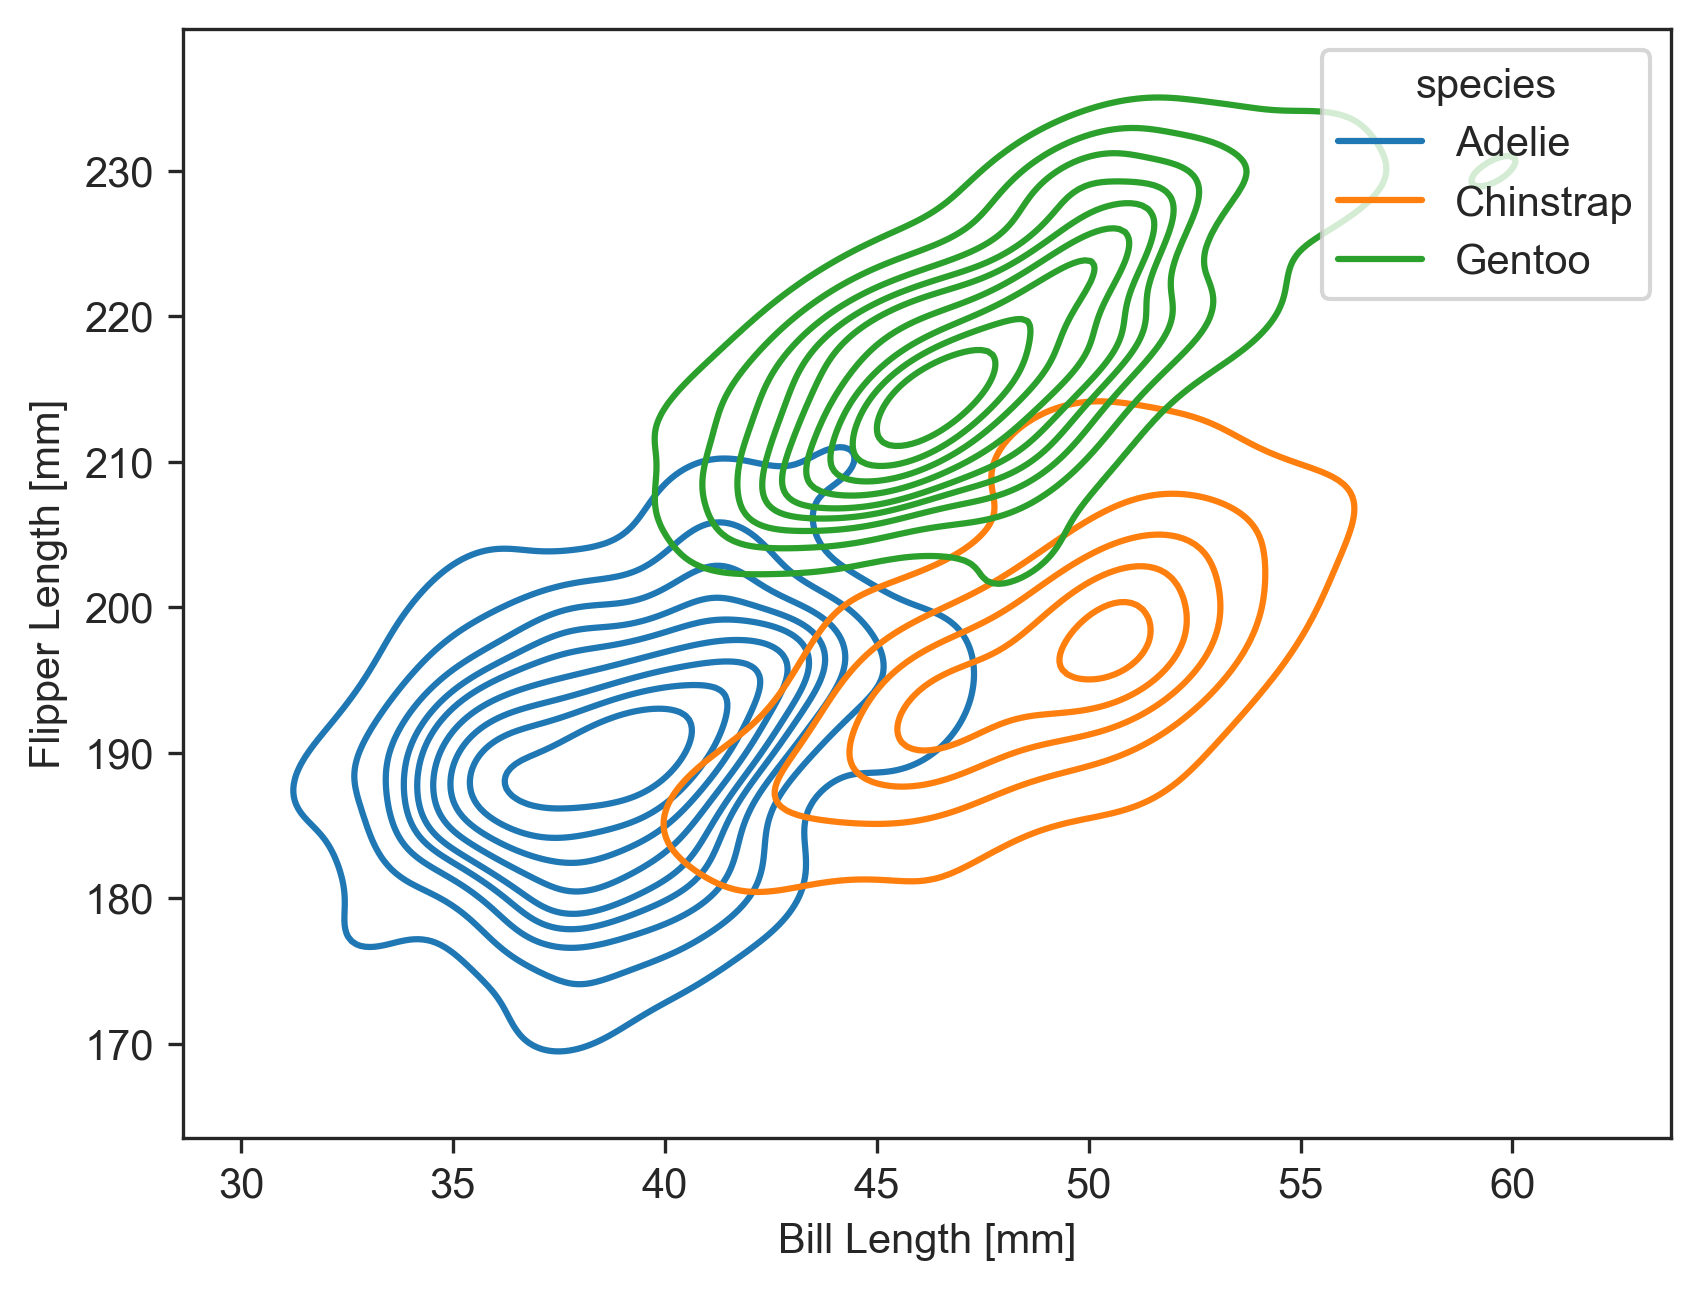

In [16]:
#let's go back to the penguins data set & plot bill length vs flipper
# length for each species as a series of overlapping contours.
#Here's the easy way, with Seaborn:
plt.figure(dpi=300)
sb.set_style('ticks')
sb.kdeplot(penguins,x='bill_length_mm',y='flipper_length_mm',hue='species')
#This command also has log-scale kwargs for log binning
plt.xlabel('Bill Length [mm]')
plt.ylabel('Flipper Length [mm]')
#you can override the axes labels if there's only 1 set or you know which axes are which on a grid
plt.show()

In [ ]:
#Now here's what you have to go through to do the same thing
# with just Numpy & Matplotlib
#But first we have to convert the dataFrame to arrays, which you would not have to do.


Overcrowding is the biggest risk you face with scatter plots or plots featuring multiple models. If you are adding data to a figure in circulation that m,any other research groups have contributed to, **it is OK to deemphasize other data and highlight your own.** Consider:
- Decreasing the opacity (`alpha`) of other data.
- Making the marker size of your data larger, or others' data smaller.
- Showing error bars only for your own data.
- Coloring your data black and making all other data lighter colors, e.g. with a custom color cycler.
- Using a bright color for your data while using muted or neutral colors for all other data (note that this approach is not suitable for greyscale printing).
- Making line(s) you want readers to focus on thicker and more solid, or diminishing less important lines by making them dotted. Solid lines (`linestyle = '-'`) are more prominent than dashed (`linestyle = '--'`) and dot-dashed (`linestyle = '-.'`) lines, which are more prominent than dotted (`linestyle = ':'`) lines.
- Keep your data on top by setting the `zorder` kwarg to a large number, at least as large as the total number of separate data sets you must add, plus any grids or text. (Note: if you call `ax.grid()`, set `zorder=0` to keep the grid on the bottom.)

Here's an example of how I put most of those tips into practice in one of my papers: ![fig 3 from Pitts et al 2021](https://www.aanda.org/articles/aa/full_html/2022/01/aa42324-21/aa42324-21-fig6.jpg) (Yes, I neglected to turn on axis ticks all the way around.)

#### **2. Uncertainty handling**
Scattered data by the numbers:
- With only a few tens of data points, *individual error bars or limits on each point are a must.* Caps are also recommended show that the error bars are uncertainties and not just the arms of `+` or `|` markers.
- For several tens to ~100 data points, you may omit the caps to reduce clutter and/or show error bars on every nth point with the `errorevery` kwarg.
- For several hundred to a few thousand points, plotting a point in a corner with representative error bars can work well (or a few representative points if the data come from several sources, instruments, or methods).

Lines:
- First use `fill_between()` (or `fill_betweenx()`) with a light color or a low opacity (`alpha` kwarg), and then overplot the main model/data line(s). [The Matplotlib docs also have a template to produce a similar effect for parametric curves](https://matplotlib.org/stable/gallery/lines_bars_and_markers/curve_error_band.html). This approach is more intuitive than plotting the upper and lower uncertainty margins as separate lines.

Error bars can be tricky if you have a mix of firm margins and limits, especially if your error bars are asymmetric.
- The `lolims`, `uplims`, `xlolims`, and `xuplims` kwargs take boolean mask arrays.
- Where the limit masks are `True`, the `xerr` and/or `yerr` arrays must still have values to use as the lengths of the limit arrows  Recommended: use a length that contrasts with data that have firmer margins.
- If the error bars are asymmetric, wherever there is a limit, there must be a positive value in the direction that the limit arrow should point; the other value will be ignored unless it raises a value error (e.g. 0 on a log-log plot).

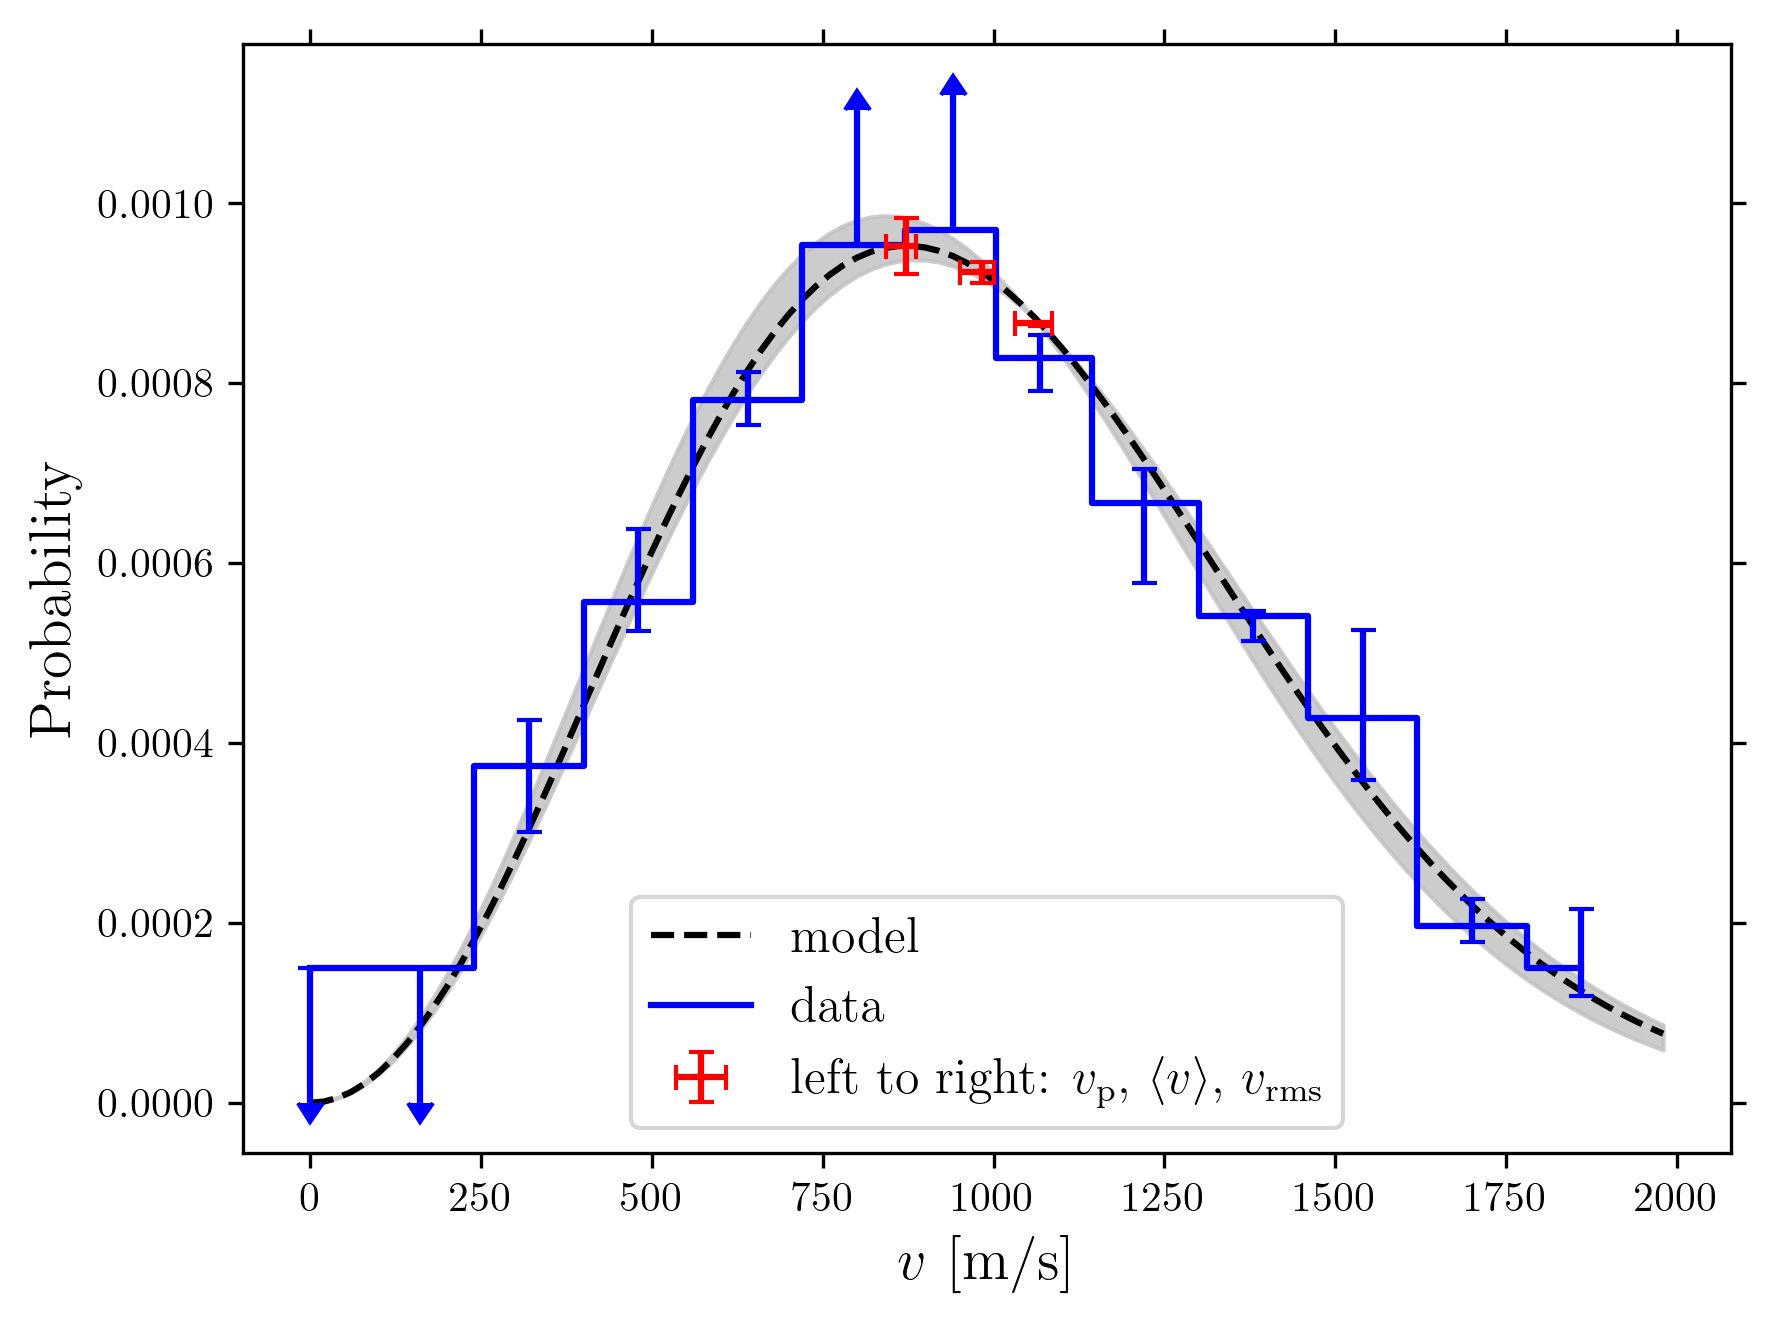

In [252]:
#The velocity distribution of atoms in a xenon lamp is known at room 
# temp (off), but what about when you turn it on and it hits 5600-6200K?
# (let T = 6000^+200_-400 K)
mpl.rc('font',**{'family':'serif','serif':['Liberation Serif']})

k_B = 1.380649*10**-23
m_amu = 1.660539*10**-27 #atomic mass unit
# k_B / m_amu = 8313.25
def max_boltz_pdf(v,m_u,T):
    m2kT = m_u*m_amu / (2*k_B*T)
    return ((m2kT / np.pi)**1.5) * (4*np.pi*v**2) * np.exp(-(v**2) * m2kT)
#Most probable velocity:
mpvs = np.sqrt(2*k_B*np.array([5600.,6000.,6200.]) /
               (131.293*m_amu) ) # = 872 m/s at T=6000 K
mv = mpvs*2/np.sqrt(np.pi)
rmsv = mpvs*np.sqrt(1.5)
x = np.array([mpvs[1],mv[1],rmsv[1]])
vs = np.sort(np.concatenate((np.arange(0.,2000.,20.),x)))

mpl.rc('text', usetex=True)
fig, ax = plt. subplots(dpi=300)
mbd_6000 = max_boltz_pdf(vs,131.293,6000.)
mbd_5600 = max_boltz_pdf(vs,131.293,5600.)
mbd_6200 = max_boltz_pdf(vs,131.293,6200.)
ax.fill_between(vs, mbd_5600, mbd_6200, alpha=0.8, color='silver')
ax.plot(vs, mbd_6000, 'k--', label='model')
y = max_boltz_pdf(x,131.293,6000.)
xerrs = [x-np.array([mpvs[0],mv[0],rmsv[0]]),
         np.array([mpvs[2],mv[2],rmsv[2]])-x]
yerrs = np.zeros((2,3))
for i,xi in enumerate(x):
    vi = np.where(vs == xi)
    if mbd_6000[vi]-mbd_5600[vi] > 0:
        yerrs[0][i] = mbd_6000[vi]-mbd_5600[vi]
    else:
        yerrs[1][i] = abs(mbd_6000[vi]-mbd_5600[vi])
    if mbd_6200[vi]-mbd_6000[vi] > 0:
        yerrs[1][i] = mbd_6200[vi]-mbd_6000[vi]
    else:
        yerrs[0][i] = abs(mbd_6000[vi]-mbd_5600[vi])

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, linestyle='', 
            ecolor='r', capsize=3, zorder=20,
            label = r'left to right: $v_{\mathrm{p}}$, $\langle v \rangle$, $v_{\mathrm{rms}}$') 
ax.set_xlabel('$v$ [m/s]',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(top=True, right=True)
#Now let's say you managed to stick a detector inside to measure the
# velocity distribution
#Mock up some data with noise, errors, and limit masks
probs = mbd_6000[::8]+np.random.default_rng().uniform(-1,1,len(vs[::8]))*0.0001
probs[np.where(probs<0.00015)]=0.00015
perrs = np.array([np.random.default_rng().uniform(0,1,len(vs[::8]))*0.0001,
         np.random.default_rng().uniform(0,1,len(vs[::8]))*0.0001])
plolims = np.zeros(probs.shape)
puplims = np.zeros(probs.shape)
puplims[0:2]=1
plolims[5:7]=1
perrs[1,5:7]=0.00015
perrs[0,0:2]=0.00015
ax.step(vs[::8], probs,color='b', where='mid', label='data')
ax.errorbar(vs[::8],probs,yerr=perrs, lolims=plolims, uplims=puplims,
            linestyle='', ecolor='b', capsize=3)
#Note: capsize also controls arrow size
ax.legend(loc=8,fontsize=12)
plt.show()

#### **3. Lines**
If you know all the color and linestyle options there are for lines, it's easy to think you could technically cram several tens of lines into one plot. In practice, the upper limit depends heavily on what else is on the figure, and many of the color or line options are not really usable together.
- Lines with error margins and/or underlying scattered data: **4-5 curves** depending on whether underlying data have color
- Lines without error margins and no underlying scattered data: 
  * <span style="color:silver">**8-10 independent curves** of similar importance</span>
  * <span style="color:silver">**10-20 curves on a hierarchy**</span>
  * <span style="color:silver">**many if data are correlated and evolving** with a third variable (e.g., annual mean temperature curves over time, or spectra of chemicals sublimating from ice over a temperature range)</span>
  
Since the different linestyles have varying levels of clarity, there is an unspoken hierarchy of linestyles that should be considered in the context of your message: 
1. Solid lines (`ls='-'`) - clearest $\to$ most important
2. Dashed lines (`ls='--'`)
3. Dot-dashed lines (`ls='-.'`)
4. Dotted lines (`ls=':'`) - easiest to lose among scattered data $\to$ least important

If you are plotting on top of scattered data, it's generally best to avoid the dotted style altogether.